In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import plotly
import plotly.express as px

import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

### Merging different CSV files

In [2]:
df1=pd.read_csv('IPC_2001_2012.csv')
df2=pd.read_csv('crimes_against_women_2001_2012.csv')
df3=pd.read_csv('District_wise_crimes_committed_against_children_2001_2012.csv') 
df4=pd.read_csv('crime_against_SC_2001_2012.csv')
df5=pd.read_csv('crime_against_ST_2001_2012.csv')

In [3]:
df=pd.concat([df1,df2['Total crimes against women'],df3['Total crimes against children'],df4['Total crimes against SCs'],df5['Total crimes against STs']],axis=1)

In [4]:
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))
df.head()

We have 9018 Rows and 37 Columns in our dataframe


STATE/UT       DISTRICT    YEAR  MURDER  ATTEMPT TO MURDER  \
0  ANDHRA PRADESH       ADILABAD  2001.0   101.0               60.0   
1  ANDHRA PRADESH      ANANTAPUR  2001.0   151.0              125.0   
2  ANDHRA PRADESH       CHITTOOR  2001.0   101.0               57.0   
3  ANDHRA PRADESH       CUDDAPAH  2001.0    80.0               53.0   
4  ANDHRA PRADESH  EAST GODAVARI  2001.0    82.0               67.0   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                       17.0  50.0             0.0   
1                                        1.0  23.0             0.0   
2                                        2.0  27.0             0.0   
3                                        1.0  20.0             0.0   
4                                        1.0  23.0             0.0   

   OTHER RAPE  KIDNAPPING & ABDUCTION  ...  INSULT TO MODESTY OF WOMEN  \
0        50.0                    46.0  ...                        34.0   
1        23.0                    53.0  ...                        24.0   
2        27.0                    59.0  ...                        83.0   
3        20.0                    25.0  ...                        38.0   
4        23.0                    49.0  ...                        58.0   

   CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                                175.0   
1                                154.0   
2                                186.0   
3                                 57.0   
4                                247.0   

   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                          0.0                        181.0   
1                                          0.0                        270.0   
2                                          0.0                        404.0   
3                                          0.0                        233.0   
4                                          0.0                        431.0   

   OTHER IPC CRIMES  TOTAL IPC CRIMES  Total crimes against women  \
0            1518.0            4154.0                       454.0   
1             754.0            4125.0                       356.0   
2            1262.0            5818.0                       456.0   
3            1181.0            3140.0                       278.0   
4            2313.0            6507.0                       475.0   

   Total crimes against children  Total crimes against SCs  \
0                            0.0                        55   
1                           66.0                       127   
2                            0.0                       114   
3                            0.0                       100   
4                            0.0                        89   

   Total crimes against STs  
0                        18  
1                        14  
2                         2  
3                         4  
4                        14  

[5 rows x 37 columns]

In [5]:
# Cheking columns Inforamtion using info method
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9018 entries, 0 to 9017
Data columns (total 37 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   STATE/UT                                             9017 non-null   object 
 1   DISTRICT                                             9017 non-null   object 
 2   YEAR                                                 9017 non-null   float64
 3   MURDER                                               9017 non-null   float64
 4   ATTEMPT TO MURDER                                    9017 non-null   float64
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9017 non-null   float64
 6   RAPE                                                 9017 non-null   float64
 7   CUSTODIAL RAPE                                       9017 non-null   float64
 8   OTHER RAPE                                           9017 non-null  

__Column Description:__

- State/UT - Representing each State/UT
- District- Various Districs for every state
- Year- from 2001 to 2012 (in which crimes were committed)
- Different Crimes which comes under diiferent categories- 
- 'MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE', 'OTHER RAPE', 'KIDNAPPING & ABDUCTION','KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS','KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY','PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',  'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT', 'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES','IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES','CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES',
       
- 'TOTAL IPC CRIMES',
- 'Total crimes against women', 
- 'Total crimes against children',
- 'Total crimes against SCs', 
- 'Total crimes against STs'


In [6]:
## checking for missing values
df.isna().sum()

STATE/UT                                               1
DISTRICT                                               1
YEAR                                                   1
MURDER                                                 1
ATTEMPT TO MURDER                                      1
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              1
RAPE                                                   1
CUSTODIAL RAPE                                         1
OTHER RAPE                                             1
KIDNAPPING & ABDUCTION                                 1
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            1
KIDNAPPING AND ABDUCTION OF OTHERS                     1
DACOITY                                                1
PREPARATION AND ASSEMBLY FOR DACOITY                   1
ROBBERY                                                1
BURGLARY                                               1
THEFT                                                  1
AUTO THEFT                     

We got som missing values in our dataset which is very less , we can drop these nul values as it will cause no effect on our dataset.

In [7]:
df = df.dropna()


In [8]:
df

STATE/UT       DISTRICT    YEAR  MURDER  ATTEMPT TO MURDER  \
0     ANDHRA PRADESH       ADILABAD  2001.0   101.0               60.0   
1     ANDHRA PRADESH      ANANTAPUR  2001.0   151.0              125.0   
2     ANDHRA PRADESH       CHITTOOR  2001.0   101.0               57.0   
3     ANDHRA PRADESH       CUDDAPAH  2001.0    80.0               53.0   
4     ANDHRA PRADESH  EAST GODAVARI  2001.0    82.0               67.0   
...              ...            ...     ...     ...                ...   
9010        DELHI UT            STF  2012.0     0.0                1.0   
9011        DELHI UT           WEST  2012.0    52.0               37.0   
9012     LAKSHADWEEP    LAKSHADWEEP  2012.0     0.0                0.0   
9013     LAKSHADWEEP          TOTAL  2012.0     0.0                0.0   
9014      PUDUCHERRY       KARAIKAL  2012.0     5.0                6.0   

      CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                          17.0  50.0             0.0   
1                                           1.0  23.0             0.0   
2                                           2.0  27.0             0.0   
3                                           1.0  20.0             0.0   
4                                           1.0  23.0             0.0   
...                                         ...   ...             ...   
9010                                        0.0   0.0             0.0   
9011                                       10.0  79.0             0.0   
9012                                        0.0   0.0             0.0   
9013                                        0.0   0.0             0.0   
9014                                        2.0   6.0             0.0   

      OTHER RAPE  KIDNAPPING & ABDUCTION  ...  INSULT TO MODESTY OF WOMEN  \
0           50.0                    46.0  ...                        34.0   
1           23.0                    53.0  ...                        24.0   
2           27.0                    59.0  ...                        83.0   
3           20.0                    25.0  ...                        38.0   
4           23.0                    49.0  ...                        58.0   
...          ...                     ...  ...                         ...   
9010         0.0                     0.0  ...                         0.0   
9011        79.0                   454.0  ...                         6.0   
9012         0.0                     0.0  ...                         0.0   
9013         0.0                     0.0  ...                         0.0   
9014         6.0                     2.0  ...                         0.0   

      CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                                   175.0   
1                                   154.0   
2                                   186.0   
3                                    57.0   
4                                   247.0   
...                                   ...   
9010                                  0.0   
9011                                327.0   
9012                                  1.0   
9013                                  1.0   
9014                                  1.0   

      IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   
...                                           ...   
9010                                          0.0   
9011                                          0.0   
9012                                          0.0   
9013                                          0.0   
9014                                          0.0   

      CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  TOTAL IPC CRIMES  \
0                           181.0            1518.0            4154.0 

__we deleted 3 rows that contained 3 value since our datast has 9000 rows so it won't make much impach on or dataset.__

In [9]:
df['DISTRICT'].value_counts()

TOTAL              407
G.R.P.              46
SOUTH               37
NORTH               37
WEST                36
                  ... 
RAILWAYS KMR         1
MIDNAPUR             1
A and N ISLANDS      1
KAWARDHA             1
CAR                  1
Name: DISTRICT, Length: 808, dtype: int64

I suppose Total in DIstrct is showing total of the states and we need our clusters in district form it will make some influence while making the cluster so its better to drop these total rows and DELHI UT TOTAL rows as well.

In [10]:
## Getting the index values of the 'TOTAL' rows
print(list(np.where(df1["DISTRICT"]=='TOTAL')))

[array([  28,   42,   70,  115,  135,  138,  169,  190,  204,  228,  253,
        285,  302,  351,  397,  407,  415,  424,  435,  470,  495,  529,
        534,  573,  578,  650,  664,  688,  691,  693,  695,  698,  713,
        715,  744,  758,  786,  831,  851,  854,  885,  906,  920,  945,
        970, 1002, 1019, 1068, 1114, 1124, 1132, 1141, 1152, 1187, 1212,
       1246, 1251, 1289, 1294, 1366, 1380, 1406, 1409, 1411, 1413, 1416,
       1432, 1434, 1464, 1480, 1508, 1553, 1574, 1577, 1608, 1629, 1643,
       1668, 1693, 1725, 1745, 1797, 1843, 1853, 1861, 1870, 1881, 1916,
       1941, 1975, 1980, 2018, 2023, 2095, 2109, 2135, 2138, 2140, 2142,
       2145, 2160, 2162, 2192, 2208, 2236, 2281, 2302, 2305, 2336, 2357,
       2371, 2396, 2421, 2453, 2473, 2525, 2571, 2581, 2589, 2598, 2609,
       2644, 2669, 2703, 2708, 2747, 2752, 2824, 2838, 2864, 2867, 2869,
       2871, 2874, 2889, 2891, 2921, 2937, 2968, 3013, 3035, 3038, 3069,
       3091, 3105, 3130, 3155, 3187, 3207, 3259, 3

In [11]:
print(list(np.where(df1["DISTRICT"]=='TOTAL')))

[array([  28,   42,   70,  115,  135,  138,  169,  190,  204,  228,  253,
        285,  302,  351,  397,  407,  415,  424,  435,  470,  495,  529,
        534,  573,  578,  650,  664,  688,  691,  693,  695,  698,  713,
        715,  744,  758,  786,  831,  851,  854,  885,  906,  920,  945,
        970, 1002, 1019, 1068, 1114, 1124, 1132, 1141, 1152, 1187, 1212,
       1246, 1251, 1289, 1294, 1366, 1380, 1406, 1409, 1411, 1413, 1416,
       1432, 1434, 1464, 1480, 1508, 1553, 1574, 1577, 1608, 1629, 1643,
       1668, 1693, 1725, 1745, 1797, 1843, 1853, 1861, 1870, 1881, 1916,
       1941, 1975, 1980, 2018, 2023, 2095, 2109, 2135, 2138, 2140, 2142,
       2145, 2160, 2162, 2192, 2208, 2236, 2281, 2302, 2305, 2336, 2357,
       2371, 2396, 2421, 2453, 2473, 2525, 2571, 2581, 2589, 2598, 2609,
       2644, 2669, 2703, 2708, 2747, 2752, 2824, 2838, 2864, 2867, 2869,
       2871, 2874, 2889, 2891, 2921, 2937, 2968, 3013, 3035, 3038, 3069,
       3091, 3105, 3130, 3155, 3187, 3207, 3259, 3

In [12]:
print(list(np.where(df1["DISTRICT"]=='DELHI UT TOTAL')))

[array([ 700, 1418, 2147, 2876, 3609, 4348, 5090, 5849, 6616, 7395, 8186,
       8997], dtype=int64)]


I got indices values for each Total And DELHI total rows we can dropthese rows.

In [13]:
df.drop([  700, 1418, 2147, 2876, 3609, 4348, 5090, 5849, 6616, 7395, 8186,
       8997,28,   42,   70,  115,  135,  138,  169,  190,  204,  228,  253,
        285,  302,  351,  397,  407,  415,  424,  435,  470,  495,  529,
        534,  573,  578,  650,  664,  688,  691,  693,  695,  698,  713,
        715,  744,  758,  786,  831,  851,  854,  885,  906,  920,  945,
        970, 1002, 1019, 1068, 1114, 1124, 1132, 1141, 1152, 1187, 1212,
       1246, 1251, 1289, 1294, 1366, 1380, 1406, 1409, 1411, 1413, 1416,
       1432, 1434, 1464, 1480, 1508, 1553, 1574, 1577, 1608, 1629, 1643,
       1668, 1693, 1725, 1745, 1797, 1843, 1853, 1861, 1870, 1881, 1916,
       1941, 1975, 1980, 2018, 2023, 2095, 2109, 2135, 2138, 2140, 2142,
       2145, 2160, 2162, 2192, 2208, 2236, 2281, 2302, 2305, 2336, 2357,
       2371, 2396, 2421, 2453, 2473, 2525, 2571, 2581, 2589, 2598, 2609,
       2644, 2669, 2703, 2708, 2747, 2752, 2824, 2838, 2864, 2867, 2869,
       2871, 2874, 2889, 2891, 2921, 2937, 2968, 3013, 3035, 3038, 3069,
       3091, 3105, 3130, 3155, 3187, 3207, 3259, 3305, 3315, 3323, 3332,
       3343, 3378, 3403, 3437, 3442, 3480, 3485, 3557, 3571, 3597, 3600,
       3602, 3604, 3607, 3622, 3624, 3654, 3670, 3701, 3746, 3768, 3771,
       3802, 3825, 3839, 3864, 3889, 3921, 3941, 3993, 4039, 4049, 4057,
       4066, 4077, 4112, 4138, 4177, 4182, 4220, 4225, 4297, 4311, 4336,
       4339, 4341, 4343, 4346, 4361, 4364, 4394, 4410, 4441, 4486, 4508,
       4511, 4542, 4565, 4579, 4604, 4631, 4663, 4683, 4735, 4781, 4791,
       4799, 4808, 4820, 4855, 4881, 4920, 4925, 4963, 4968, 5040, 5054,
       5079, 5081, 5083, 5085, 5088, 5104, 5107, 5137, 5153, 5184, 5229,
       5251, 5254, 5286, 5309, 5323, 5351, 5378, 5412, 5431, 5485, 5531,
       5542, 5550, 5559, 5571, 5608, 5634, 5674, 5679, 5718, 5723, 5796,
       5810, 5835, 5838, 5840, 5842, 5845, 5865, 5868, 5898, 5915, 5946,
       5991, 6013, 6016, 6048, 6071, 6087, 6116, 6143, 6177, 6196, 6250,
       6296, 6307, 6315, 6324, 6336, 6373, 6399, 6439, 6444, 6485, 6490,
       6563, 6577, 6602, 6605, 6607, 6609, 6612, 6632, 6635, 6669, 6687,
       6718, 6763, 6785, 6788, 6821, 6844, 6860, 6890, 6917, 6952, 6971,
       7025, 7071, 7082, 7090, 7099, 7111, 7148, 7175, 7216, 7221, 7262,
       7268, 7342, 7356, 7381, 7384, 7386, 7388, 7391, 7411, 7414, 7448,
       7466, 7497, 7542, 7565, 7568, 7603, 7626, 7642, 7672, 7699, 7735,
       7756, 7810, 7856, 7867, 7875, 7884, 7896, 7933, 7962, 8004, 8009,
       8049, 8055, 8132, 8146, 8172, 8175, 8177, 8179, 8182, 8202, 8205,
       8239, 8257, 8290, 8335, 8364, 8367, 8402, 8426, 8442, 8473, 8500,
       8536, 8557, 8611, 8657, 8668, 8676, 8685, 8697, 8734, 8763, 8806,
       8811, 8851, 8861, 8938, 8952, 8982, 8986, 8988, 8990, 8993, 9013], axis=0, inplace=True)

In [14]:
df.reset_index(drop = True)

STATE/UT       DISTRICT    YEAR  MURDER  ATTEMPT TO MURDER  \
0     ANDHRA PRADESH       ADILABAD  2001.0   101.0               60.0   
1     ANDHRA PRADESH      ANANTAPUR  2001.0   151.0              125.0   
2     ANDHRA PRADESH       CHITTOOR  2001.0   101.0               57.0   
3     ANDHRA PRADESH       CUDDAPAH  2001.0    80.0               53.0   
4     ANDHRA PRADESH  EAST GODAVARI  2001.0    82.0               67.0   
...              ...            ...     ...     ...                ...   
8591        DELHI UT     SOUTH-WEST  2012.0    47.0               48.0   
8592        DELHI UT            STF  2012.0     0.0                1.0   
8593        DELHI UT           WEST  2012.0    52.0               37.0   
8594     LAKSHADWEEP    LAKSHADWEEP  2012.0     0.0                0.0   
8595      PUDUCHERRY       KARAIKAL  2012.0     5.0                6.0   

      CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                          17.0  50.0             0.0   
1                                           1.0  23.0             0.0   
2                                           2.0  27.0             0.0   
3                                           1.0  20.0             0.0   
4                                           1.0  23.0             0.0   
...                                         ...   ...             ...   
8591                                        6.0  87.0             0.0   
8592                                        0.0   0.0             0.0   
8593                                       10.0  79.0             0.0   
8594                                        0.0   0.0             0.0   
8595                                        2.0   6.0             0.0   

      OTHER RAPE  KIDNAPPING & ABDUCTION  ...  INSULT TO MODESTY OF WOMEN  \
0           50.0                    46.0  ...                        34.0   
1           23.0                    53.0  ...                        24.0   
2           27.0                    59.0  ...                        83.0   
3           20.0                    25.0  ...                        38.0   
4           23.0                    49.0  ...                        58.0   
...          ...                     ...  ...                         ...   
8591        87.0                   399.0  ...                        21.0   
8592         0.0                     0.0  ...                         0.0   
8593        79.0                   454.0  ...                         6.0   
8594         0.0                     0.0  ...                         0.0   
8595         6.0                     2.0  ...                         0.0   

      CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                                   175.0   
1                                   154.0   
2                                   186.0   
3                                    57.0   
4                                   247.0   
...                                   ...   
8591                                207.0   
8592                                  0.0   
8593                                327.0   
8594                                  1.0   
8595                                  1.0   

      IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   
...                                           ...   
8591                                          0.0   
8592                                          0.0   
8593                                          0.0   
8594                                          0.0   
8595                                          0.0   

      CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  TOTAL IPC CRIMES  \
0                           181.0            1518.0            4154.0 

In [15]:
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))

We have 8596 Rows and 37 Columns in our dataframe


__Dropping few columns like-'INSULT TO MODESTY OF WOMEN','KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS','CRUELTY BY HUSBAND OR HIS RELATIVES','IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES','ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY'
columns from our dataset as it comes under  Total crimes against women we already have that column in our dataset__

In [16]:
df.drop(['INSULT TO MODESTY OF WOMEN','KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS','CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
    'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY'],axis=1, inplace=True)

In [17]:
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))

We have 8596 Rows and 32 Columns in our dataframe


In [18]:
df.describe()

YEAR       MURDER  ATTEMPT TO MURDER  \
count  8596.000000  8596.000000        8596.000000   
mean   2006.634714    46.826315          40.944160   
std       3.463783    42.757595          50.592362   
min    2001.000000     0.000000           0.000000   
25%    2004.000000    18.000000          10.000000   
50%    2007.000000    37.000000          27.000000   
75%    2010.000000    63.000000          54.000000   
max    2012.000000   542.000000         741.000000   

       CULPABLE HOMICIDE NOT AMOUNTING TO MURDER         RAPE  CUSTODIAL RAPE  \
count                                8596.000000  8596.000000     8596.000000   
mean                                    5.188925    27.818753        0.003025   
std                                     9.948449    30.898847        0.079206   
min                                     0.000000     0.000000        0.000000   
25%                                     0.000000     8.000000        0.000000   
50%                                     2.000000    19.000000        0.000000   
75%                                     5.000000    39.000000        0.000000   
max                                   241.000000   568.000000        5.000000   

        OTHER RAPE  KIDNAPPING & ABDUCTION  \
count  8596.000000             8596.000000   
mean     27.815728               41.512331   
std      30.894872               56.064790   
min       0.000000                0.000000   
25%       8.000000                9.000000   
50%      19.000000               24.000000   
75%      39.000000               52.000000   
max     568.000000              587.000000   

       KIDNAPPING AND ABDUCTION OF OTHERS      DACOITY  ...        ARSON  \
count                         8596.000000  8596.000000  ...  8596.000000   
mean                            10.812820     6.910656  ...    13.225221   
std                             21.319814    10.946224  ...    30.416814   
min                              0.000000     0.000000  ...     0.000000   
25%                              1.000000     1.000000  ...     2.000000   
50%                              5.000000     3.000000  ...     8.000000   
75%                             12.000000     9.000000  ...    18.000000   
max                            484.000000   219.000000  ...  2350.000000   

       HURT/GREVIOUS HURT  DOWRY DEATHS  CAUSING DEATH BY NEGLIGENCE  \
count         8596.000000   8596.000000                  8596.000000   
mean           392.187529     10.609819                   116.524546   
std            559.609844     14.186965                   155.595962   
min              0.000000      0.000000                     0.000000   
25%             40.000000      1.000000                     5.000000   
50%            191.000000      5.000000                    65.000000   
75%            490.000000     15.000000                   166.000000   
max           4837.000000    168.000000                  2058.000000   

       OTHER IPC CRIMES  TOTAL IPC CRIMES  Total crimes against women  \
count       8596.000000       8596.000000                 8596.000000   
mean        1140.200209       2784.685900                  238.193695   
std         1438.891790       3068.186327                  291.531062   
min            0.000000          0.000000                    0.000000   
25%          255.000000        834.750000                   62.000000   
50%          714.500000       2011.000000                  162.000000   
75%         1527.250000       3789.500000                  308.000000   
max        32452.000000      34638.000000                 4556.000000   

       Total crimes against children  Total crimes against SCs  \
count                    8596.000000               8596.000000   
mean                       55.777106                 69.808632   
std                       263.230052                323.825989   
min                         0.000000                  0.000000   
25%                         0.000000                  1.0000

__OBservations__

- Murder Column min value is 0 and highest murder value is 542 that means fw district should have this count as a murder max value
- ATTTEMPT TO MURDER maximum value is 741 , similray for RAPE column its 568 , we can check for  other columns as well
- TOTAL IPC CRIMAS min value is 0 and MAximum value is 34638 ,Total crimes agianst women has min value is 0 , maximum value is 4556.

So baesd upon these value observations .. __Districts which have MIn values will come under peacefull area, District with mid values will come under moderate area and district which have maximum values for clumns will come under Sensitive Area.__

Checking dataset by groupibg by Districts

In [19]:
#Grouping by each state/ut
group_state = df.groupby('STATE/UT')

In [20]:
group_state.first()

DISTRICT    YEAR  MURDER  ATTEMPT TO MURDER  \
STATE/UT                                                                  
A & N ISLANDS                ANDAMAN  2001.0    13.0                0.0   
ANDHRA PRADESH              ADILABAD  2001.0   101.0               60.0   
ARUNACHAL PRADESH          CHANGLANG  2001.0    11.0                2.0   
ASSAM                        BARPETA  2001.0    64.0                5.0   
BIHAR                         ARARIA  2001.0    47.0               27.0   
CHANDIGARH                CHANDIGARH  2001.0    15.0               10.0   
CHHATTISGARH               BALRAMPUR  2001.0    13.0                2.0   
D & N HAVELI          D and N HAVELI  2001.0     3.0                2.0   
DAMAN & DIU                    DAMAN  2001.0     6.0                5.0   
DELHI UT                     CENTRAL  2001.0    29.0               42.0   
GOA                        NORTH GOA  2001.0    22.0               16.0   
GUJARAT             AHMEDABAD COMMR.  2001.0    90.0               58.0   
HARYANA                       AMBALA  2001.0    26.0               23.0   
HIMACHAL PRADESH            BILASPUR  2001.0     8.0               10.0   
JAMMU & KASHMIR             ANANTNAG  2001.0    74.0               41.0   
JHARKHAND                     BOKARO  2001.0    70.0               75.0   
KARNATAKA                   BAGALKOT  2001.0    59.0               34.0   
KERALA                      ALAPUZHA  2001.0    22.0               32.0   
LAKSHADWEEP              LAKSHADWEEP  2001.0     1.0                0.0   
MADHYA PRADESH              BALAGHAT  2001.0    56.0               43.0   
MAHARASHTRA               AHMEDNAGAR  2001.0    97.0               41.0   
MANIPUR                    BISHNUPUR  2001.0    29.0               25.0   
MEGHALAYA            GARO HILLS EAST  2001.0    16.0                9.0   
MIZORAM                       AIZAWL  2001.0    12.0                6.0   
NAGALAND                     DIMAPUR  2001.0    36.0                5.0   
ODISHA                         ANGUL  2001.0    39.0               27.0   
PUDUCHERRY               PONDICHERRY  2001.0    25.0               32.0   
PUNJAB                      AMRITSAR  2001.0    36.0               43.0   
RAJASTHAN                      AJMER  2001.0    39.0               47.0   
SIKKIM                          EAST  2001.0    13.0                7.0   
TAMIL NADU                  ARIYALUR  2001.0    24.0               41.0   
TRIPURA                       DHALAI  2001.0    35.0                0.0   
UTTAR PRADESH                   AGRA  2001.0   153.0              162.0   
UTTARAKHAND                   ALMORA  2001.0    18.0               12.0   
WEST BENGAL        24 PARGANAS NORTH  2001.0   202.0               23.0   

                   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  \
STATE/UT                                                             
A & N ISLANDS                                            0.0   3.0   
ANDHRA PRADESH                                          17.0  50.0   
ARUNACHAL PRADESH                                        0.0   1.0   
ASSAM                                                    0.0  28.0   
BIHAR                                                    4.0  93.0   
CHANDIGARH                                               6.0  18.0   
CHHATTISGARH                                             0.0  17.0   
D & N HAVELI                                             0.0   6.0   
DAMAN & DIU                                              0.0   0.0   
DELHI UT                                                 4.0  28.0   
GOA                                                      4.0   4.0   
GUJARAT                                                 60.0  39.0   
HARYANA                                                  2.0  11.0   
HIMACHAL PRADESH                                         0.0   5.0   
JAMMU & KASHMIR                                          0.0   6.0   
JHARKHAND                                                2.0  

In [19]:
# Print the maximum value in each group
group_state.max()

DISTRICT    YEAR  MURDER  ATTEMPT TO MURDER  \
STATE/UT                                                                    
A & N ISLANDS                    SOUTH  2012.0    16.0               19.0   
ANDHRA PRADESH           WEST GODAVARI  2012.0   214.0              248.0   
ARUNACHAL PRADESH  UPPER DIBANG VALLEY  2012.0    17.0               14.0   
ASSAM                         UDALGURI  2012.0   143.0              129.0   
BIHAR                         VAISHALI  2012.0   542.0              741.0   
CHANDIGARH                  CHANDIGARH  2012.0    31.0               44.0   
CHHATTISGARH                  SURAJPUR  2012.0   139.0              181.0   
D & N HAVELI            D and N HAVELI  2012.0    14.0                5.0   
DAMAN & DIU                        DIU  2012.0    12.0                6.0   
DELHI UT                          WEST  2012.0   135.0              151.0   
GOA                          SOUTH GOA  2012.0    33.0               20.0   
GUJARAT                 W.RLY VADODARA  2012.0   222.0              143.0   
HARYANA                    YAMUNANAGAR  2012.0    93.0               77.0   
HIMACHAL PRADESH                   UNA  2012.0    38.0               22.0   
JAMMU & KASHMIR               UDHAMPUR  2012.0   144.0              269.0   
JHARKHAND                      SIMDEGA  2012.0   270.0              216.0   
KARNATAKA                      YADGIRI  2012.0   266.0              460.0   
KERALA                        WAYANADU  2012.0    58.0               80.0   
LAKSHADWEEP                LAKSHADWEEP  2012.0     1.0                2.0   
MADHYA PRADESH                 VIDISHA  2012.0   139.0              208.0   
MAHARASHTRA                   YAVATMAL  2012.0   295.0              200.0   
MANIPUR                         UKHRUL  2012.0    61.0              192.0   
MEGHALAYA                      RI-BHOI  2012.0    52.0               25.0   
MIZORAM                       SERCHHIP  2012.0    23.0               24.0   
NAGALAND                     ZUNHEBOTO  2012.0    64.0               19.0   
ODISHA                      SUNDARGARH  2012.0   109.0              259.0   
PUDUCHERRY                  PUDUCHERRY  2012.0    32.0               43.0   
PUNJAB                      TARN TARAN  2012.0    90.0              133.0   
RAJASTHAN                      UDAIPUR  2012.0   104.0              374.0   
SIKKIM                            WEST  2012.0    13.0               10.0   
TAMIL NADU                VIRUDHUNAGAR  2012.0   180.0              332.0   
TRIPURA                           WEST  2012.0   136.0               35.0   
UTTAR PRADESH                 VARANASI  2012.0   324.0              627.0   
UTTARAKHAND                 UTTARKASHI  2012.0    94.0               75.0   
WEST BENGAL             UTTAR DINAJPUR  2012.0   268.0              637.0   

                   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   RAPE  \
STATE/UT                                                              
A & N ISLANDS                                            4.0   23.0   
ANDHRA PRADESH                                          31.0  130.0   
ARUNACHAL PRADESH                                        4.0   13.0   
ASSAM                                                   71.0  181.0   
BIHAR                                                   92.0  219.0   
CHANDIGARH                                              10.0   33.0   
CHHATTISGARH                                            27.0  159.0   
D & N HAVELI                                             1.0    7.0   
DAMAN & DIU                                              1.0    5.0   
DELHI UT                                                19.0  190.0   
GOA                                                      8.0   31.0   
GUJARAT                                                 60.0   63.0   
HARYANA                                                 17.0   65.0   
HIMACHAL PRADESH                                         7.0   34.0   
JAMMU & KASHMIR                             

The above group by (maximum value) operations can help us to identify the districts of the state/ut where the crimes were committed the most (e.g. Varanasi in UP had7601 Murder cases in the year 2012, tripura west had 9194 Murder based cases in the year 2012)

The number of all the crimes were committed in the year 2012, which indicates that the number of crimes were in the rise over time till the last year of 2012(this is the last year which is in the dataset)

Of course, if we can extract more data till now, the trend should be rising too, which states that the situation is not at all good in India.

In [20]:
# Print the last value in each group
group_state.last()

DISTRICT    YEAR  MURDER  ATTEMPT TO MURDER  \
STATE/UT                                                                    
A & N ISLANDS                    SOUTH  2012.0     8.0                3.0   
ANDHRA PRADESH           WEST GODAVARI  2012.0    91.0               91.0   
ARUNACHAL PRADESH  UPPER DIBANG VALLEY  2012.0     0.0                1.0   
ASSAM                         UDALGURI  2012.0    33.0               27.0   
BIHAR                         VAISHALI  2012.0   122.0              153.0   
CHANDIGARH                  CHANDIGARH  2012.0    21.0               44.0   
CHHATTISGARH                  SURAJPUR  2012.0    59.0               16.0   
D & N HAVELI            D and N HAVELI  2012.0     7.0                2.0   
DAMAN & DIU                        DIU  2012.0     0.0                1.0   
DELHI UT                          WEST  2012.0    52.0               37.0   
GOA                          SOUTH GOA  2012.0    17.0               15.0   
GUJARAT                 W.RLY VADODARA  2012.0     5.0                0.0   
HARYANA                    YAMUNANAGAR  2012.0    24.0               34.0   
HIMACHAL PRADESH                   UNA  2012.0     6.0                2.0   
JAMMU & KASHMIR               UDHAMPUR  2012.0     5.0               19.0   
JHARKHAND                      SIMDEGA  2012.0    66.0               28.0   
KARNATAKA                      YADGIRI  2012.0    26.0               37.0   
KERALA                        WAYANADU  2012.0    10.0                5.0   
LAKSHADWEEP                LAKSHADWEEP  2012.0     0.0                0.0   
MADHYA PRADESH                 VIDISHA  2012.0    58.0               62.0   
MAHARASHTRA                   YAVATMAL  2012.0    71.0               71.0   
MANIPUR                         UKHRUL  2012.0     5.0               18.0   
MEGHALAYA                      RI-BHOI  2012.0    11.0                3.0   
MIZORAM                       SERCHHIP  2012.0     3.0                0.0   
NAGALAND                     ZUNHEBOTO  2012.0    10.0                3.0   
ODISHA                      SUNDARGARH  2012.0    48.0               59.0   
PUDUCHERRY                    KARAIKAL  2012.0     5.0                6.0   
PUNJAB                      TARN TARAN  2012.0    41.0               59.0   
RAJASTHAN                      UDAIPUR  2012.0    76.0               80.0   
SIKKIM                            WEST  2012.0     2.0                0.0   
TAMIL NADU                VIRUDHUNAGAR  2012.0    62.0               97.0   
TRIPURA                           WEST  2012.0    26.0               12.0   
UTTAR PRADESH                 VARANASI  2012.0    59.0               62.0   
UTTARAKHAND                 UTTARKASHI  2012.0     1.0                0.0   
WEST BENGAL             UTTAR DINAJPUR  2012.0   110.0              283.0   

                   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   RAPE  \
STATE/UT                                                              
A & N ISLANDS                                            0.0    8.0   
ANDHRA PRADESH                                           4.0  130.0   
ARUNACHAL PRADESH                                        0.0    0.0   
ASSAM                                                    0.0   23.0   
BIHAR                                                   13.0   20.0   
CHANDIGARH                                               5.0   27.0   
CHHATTISGARH                                             0.0   74.0   
D & N HAVELI                                             0.0    3.0   
DAMAN & DIU                                              0.0    0.0   
DELHI UT                                                10.0   79.0   
GOA                                                      0.0   29.0   
GUJARAT                                                  1.0    0.0   
HARYANA                                                  1.0   25.0   
HIMACHAL PRADESH                                         0.0    8.0   
JAMMU & KASHMIR                             

### Data preparing before applying standardization 

In [21]:
X=df[['YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS',  'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'Total crimes against women', 'Total crimes against children',
       'Total crimes against SCs', 'Total crimes against STs']]

In [22]:
from sklearn.cluster import KMeans


### Normalizing data for any type of clustering¶

Normalizing the data is important to ensure that the distance measure accords equal weight to each variable. Without normalization, the variable with the largest scale will dominate the measure.Normalization is used to eliminate redundant data and ensures that good quality clusters are generated which can improve the efficiency of clustering algorithms.So it becomes an essential step before clustering as Euclidean distance is very sensitive to the changes in the differences

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled = scaler.fit_transform(X)
print(df_scaled)
df1 = pd.DataFrame(df_scaled)

[[-1.62684623  1.26706931  0.37667639 ... -0.21190723 -0.04573287
   0.08265805]
 [-1.62684623  2.43652022  1.66153004 ...  0.03883861  0.17662169
   0.01958965]
 [-1.62684623  1.26706931  0.31737545 ... -0.21190723  0.13647434
  -0.16961554]
 ...
 [ 1.54905748  0.12100742 -0.07796413 ... -0.21190723 -0.20941054
  -0.20114974]
 [ 1.54905748 -1.09522152 -0.80934236 ... -0.18531297 -0.07970371
  -0.20114974]
 [ 1.54905748 -0.97827643 -0.69074049 ... -0.09033349 -0.21558706
  -0.20114974]]


## K-means Clustering

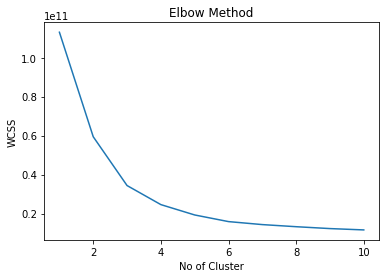

In [24]:
wcss=[] #within cluster sum of square distance
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel('No of Cluster')
plt.ylabel("WCSS")
plt.show()

Choosing k=3 as we need to form 3 cluster as per the requirementa slo, ELbow method is also showing the same thing.

In [25]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state = 42)

In [26]:
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [27]:
y_kmeans = kmeans.fit_predict(df1)

y_kmeans

array([0, 0, 0, ..., 0, 1, 1])

In [28]:
print(kmeans.labels_)

[0 0 0 ... 0 1 1]


In [29]:
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans+1

In [30]:
# New list called cluster
cluster = list(y_kmeans1)
# Adding cluster to our data set
df['cluster'] = cluster

In [31]:
#Mean of clusters 1 to 3
kmeans_mean_cluster = pd.DataFrame(round(df.groupby('cluster').mean(),1))
kmeans_mean_cluster

YEAR  MURDER  ATTEMPT TO MURDER  \
cluster                                      
1        2007.0    82.9               76.7   
2        2006.5    30.0               24.4   
3        2007.6   173.0              163.7   

         CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   RAPE  CUSTODIAL RAPE  \
cluster                                                                     
1                                              9.7   51.3             0.0   
2                                              3.1   17.1             0.0   
3                                             19.4  102.2             0.0   

         OTHER RAPE  KIDNAPPING & ABDUCTION  \
cluster                                       
1              51.3                    80.8   
2              17.1                    22.2   
3             102.2                   224.2   

         KIDNAPPING AND ABDUCTION OF OTHERS  DACOITY  ...  ARSON  \
cluster                                               ...          
1                                      21.2     12.3  ...   25.6   
2                                       5.3      4.4  ...    8.3   
3                                      77.9     27.5  ...   21.0   

         HURT/GREVIOUS HURT  DOWRY DEATHS  CAUSING DEATH BY NEGLIGENCE  \
cluster                                                                  
1                     764.9          21.3                        228.5   
2                     213.4           5.9                         66.3   
3                    1934.7          37.0                        427.6   

         OTHER IPC CRIMES  TOTAL IPC CRIMES  Total crimes against women  \
cluster                                                                   
1                  2077.9            5150.8                       470.2   
2                   677.9            1548.5                       124.1   
3                  5565.2           16985.2                      1320.4   

         Total crimes against children  Total crimes against SCs  \
cluster                                                            
1                                 82.3                      87.8   
2                                 45.6                      63.1   
3                                 53.2                      61.7   

         Total crimes against STs  
cluster                            
1                            16.9  
2                            11.2  
3                             9.3  

[3 rows x 30 columns]

__Above clusters shwing the mean value for each cluster for each crime.__

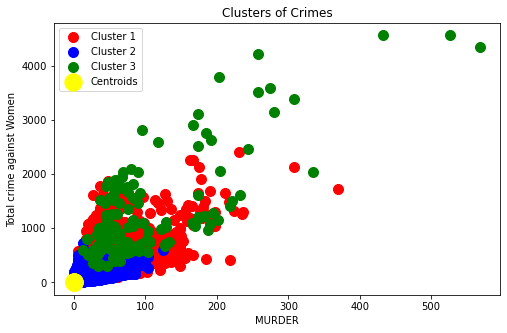

In [117]:
#y_kmeans1
plt.figure(figsize=(8,5))
plt.scatter(X[y_kmeans1 == 1]['RAPE'], X[y_kmeans1 == 1]['Total crimes against women'], s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(X[y_kmeans1 == 2]['RAPE'], X[y_kmeans1 == 2]['Total crimes against women'], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(X[y_kmeans1 == 3]['RAPE'], X[y_kmeans1 == 3]['Total crimes against women'], s = 100, c = 'green', label = 'Cluster 3')


plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Crimes')
plt.xlabel('MURDER')
plt.ylabel('Total crime against Women')
plt.savefig('clusterscatter.jpg')
plt.legend()
plt.show()

- From above cluster we have our cluster showing for Rape vs Total crimes against Women, we can clearly see that Green color dots are far from centroids so these dots come in cluster 3 that means crimes counts is higher in this cluster 3.

- Red color cluster 1 is near to the centroid that means cluster 1 has moderate count of crime 

- Similarly , Blue Color cluster 2 near to the centroids which means it has lower counts  of crime

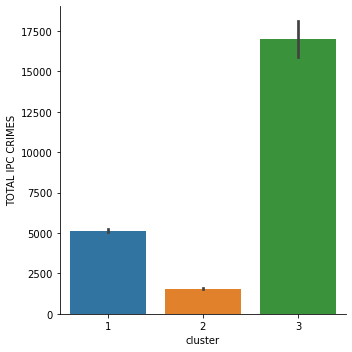

In [116]:
sns.catplot(x='cluster', y='TOTAL IPC CRIMES', data=df, kind='bar');
plt.savefig('clustercatplot.jpg')

__From above cat plot we can say that Cluster 3 has highest IPC CRIMES and Cluster 2 has lowest TOTAL IPC CRIMES__
SO we can name them as per the requirement

<AxesSubplot:xlabel='MURDER', ylabel='ATTEMPT TO MURDER'>

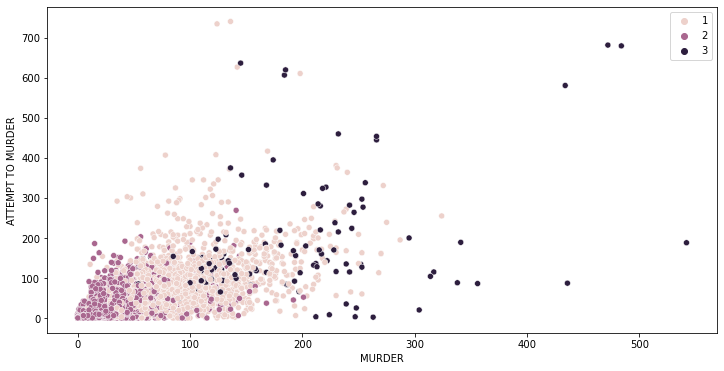

In [34]:
## Plotting scatterplot 

plt.figure(figsize=(12,6))
sns.scatterplot(x=df['MURDER'], y = df['ATTEMPT TO MURDER'],hue=y_kmeans1)

The above scatter shows a distribution of how the states are scattered and clusters are visible based on Murders and ATTEMPT to Murder. And there is a positive correlation between occurrence of Murder and ATTEMPT to Murder in different states.

__Dividng datet as per the cluster value then after analysing it will name them (sensitve/moderate/peaceful)__

In [35]:
data1=df[df['cluster']==1]
data2=df[df['cluster']==2]
data3=df[df['cluster']==3]

## grouping by district and then check for max values for each column

In [36]:
data3.groupby('DISTRICT').max()

STATE/UT    YEAR  MURDER  ATTEMPT TO MURDER  \
DISTRICT                                                               
24 PARGANAS NORTH     WEST BENGAL  2012.0   244.0              238.0   
24 PARGANAS SOUTH     WEST BENGAL  2012.0   263.0              123.0   
AGRA                UTTAR PRADESH  2012.0   181.0              182.0   
AHMEDABAD COMMR.          GUJARAT  2012.0   222.0              143.0   
ALWAR                   RAJASTHAN  2012.0   100.0               88.0   
BANGALORE COMMR.        KARNATAKA  2012.0   266.0              460.0   
CHENNAI                TAMIL NADU  2012.0   180.0              332.0   
CYBERABAD          ANDHRA PRADESH  2012.0   213.0              128.0   
GHAZIABAD           UTTAR PRADESH  2010.0   254.0              277.0   
HYDERABAD CITY     ANDHRA PRADESH  2012.0   153.0              166.0   
INDORE             MADHYA PRADESH  2012.0   135.0              208.0   
JAIPUR                  RAJASTHAN  2005.0    92.0              116.0   
JALPAIGURI            WEST BENGAL  2008.0   126.0              134.0   
KANPUR NAGAR        UTTAR PRADESH  2008.0   168.0              114.0   
KOLKATA               WEST BENGAL  2012.0    85.0              154.0   
LUCKNOW             UTTAR PRADESH  2012.0   194.0              185.0   
MUMBAI                MAHARASHTRA  2005.0   295.0              200.0   
MUMBAI COMMR.         MAHARASHTRA  2012.0   239.0              180.0   
MURSHIDABAD           WEST BENGAL  2012.0   185.0              637.0   
NADIA                 WEST BENGAL  2012.0   146.0              375.0   
NORTH WEST               DELHI UT  2001.0   134.0              107.0   
NORTH-WEST               DELHI UT  2006.0   128.0              151.0   
PATNA                       BIHAR  2012.0   542.0              682.0   
PUNE COMMR.           MAHARASHTRA  2012.0   137.0              141.0   
SOUTH                    DELHI UT  2001.0    83.0               75.0   
THANE COMMR.          MAHARASHTRA  2012.0   127.0               93.0   

                   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   RAPE  \
DISTRICT                                                              
24 PARGANAS NORTH                                      241.0  203.0   
24 PARGANAS SOUTH                                       48.0  308.0   
AGRA                                                    40.0   76.0   
AHMEDABAD COMMR.                                        60.0   63.0   
ALWAR                                                    7.0  129.0   
BANGALORE COMMR.                                         8.0   97.0   
CHENNAI                                                  4.0   94.0   
CYBERABAD                                               17.0   95.0   
GHAZIABAD                                               35.0   53.0   
HYDERABAD CITY                                           9.0   93.0   
INDORE                                                   4.0  173.0   
JAIPUR                                                  10.0   82.0   
JALPAIGURI                                              44.0  334.0   
KANPUR NAGAR                                            39.0   72.0   
KOLKATA                                                 43.0   68.0   
LUCKNOW                                                 55.0   82.0   
MUMBAI                                                   8.0  201.0   
MUMBAI COMMR.                                            9.0  232.0   
MURSHIDABAD                                             53.0  568.0   
NADIA                                                   26.0  185.0   
NORTH WEST                                              13.0  103.0   
NORTH-WEST                                              18.0  190.0   
PATNA                                                   83.0   74.0   
PUNE COMMR.                                              9.0   92.0   
SOUTH                                                    7.0   65.0   
THANE COMMR.                                             6.0  107.0   

                   

In [37]:
data3.groupby('DISTRICT').min()

STATE/UT    YEAR  MURDER  ATTEMPT TO MURDER  \
DISTRICT                                                               
24 PARGANAS NORTH     WEST BENGAL  2006.0   140.0               82.0   
24 PARGANAS SOUTH     WEST BENGAL  2007.0   158.0                2.0   
AGRA                UTTAR PRADESH  2011.0   152.0              171.0   
AHMEDABAD COMMR.          GUJARAT  2001.0    76.0               44.0   
ALWAR                   RAJASTHAN  2012.0   100.0               88.0   
BANGALORE COMMR.        KARNATAKA  2001.0   201.0              264.0   
CHENNAI                TAMIL NADU  2011.0   168.0              219.0   
CYBERABAD          ANDHRA PRADESH  2005.0   150.0               66.0   
GHAZIABAD           UTTAR PRADESH  2009.0   216.0              220.0   
HYDERABAD CITY     ANDHRA PRADESH  2001.0   102.0              109.0   
INDORE             MADHYA PRADESH  2007.0   108.0              137.0   
JAIPUR                  RAJASTHAN  2001.0    83.0               90.0   
JALPAIGURI            WEST BENGAL  2008.0   126.0              134.0   
KANPUR NAGAR        UTTAR PRADESH  2008.0   168.0              114.0   
KOLKATA               WEST BENGAL  2001.0    37.0               55.0   
LUCKNOW             UTTAR PRADESH  2005.0   114.0               86.0   
MUMBAI                MAHARASHTRA  2001.0   212.0              115.0   
MUMBAI COMMR.         MAHARASHTRA  2006.0   203.0              116.0   
MURSHIDABAD           WEST BENGAL  2009.0   145.0              395.0   
NADIA                 WEST BENGAL  2011.0   136.0              357.0   
NORTH WEST               DELHI UT  2001.0   134.0              107.0   
NORTH-WEST               DELHI UT  2005.0   128.0              121.0   
PATNA                       BIHAR  2001.0   248.0               20.0   
PUNE COMMR.           MAHARASHTRA  2005.0   104.0               85.0   
SOUTH                    DELHI UT  2001.0    83.0               75.0   
THANE COMMR.          MAHARASHTRA  2008.0    99.0               65.0   

                   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   RAPE  \
DISTRICT                                                              
24 PARGANAS NORTH                                       39.0  118.0   
24 PARGANAS SOUTH                                       25.0  205.0   
AGRA                                                    38.0   58.0   
AHMEDABAD COMMR.                                         0.0   12.0   
ALWAR                                                    7.0  129.0   
BANGALORE COMMR.                                         1.0   32.0   
CHENNAI                                                  1.0   76.0   
CYBERABAD                                                3.0   44.0   
GHAZIABAD                                               31.0   44.0   
HYDERABAD CITY                                           1.0   37.0   
INDORE                                                   2.0   82.0   
JAIPUR                                                   6.0   57.0   
JALPAIGURI                                              44.0  334.0   
KANPUR NAGAR                                            39.0   72.0   
KOLKATA                                                  8.0   19.0   
LUCKNOW                                                 26.0   48.0   
MUMBAI                                                   4.0  127.0   
MUMBAI COMMR.                                            0.0  165.0   
MURSHIDABAD                                             28.0  257.0   
NADIA                                                   21.0  174.0   
NORTH WEST                                              13.0  103.0   
NORTH-WEST                                              12.0  169.0   
PATNA                                                    4.0   27.0   
PUNE COMMR.                                              3.0   66.0   
SOUTH                                                    7.0   65.0   
THANE COMMR.                                             2.0   66.0   

                   

__Observation__

- Data3 is small as total cout is 140 but we can see the maximum values for each column(crime) is highest so data3 falls into Sensitive area as it has less rows but highest crime  values.

__Making senstivearea dataframe from data3 (with cluster value 3)__

In [38]:
sensitivearea=df[df['cluster']==3]

## Cheking for data2

In [39]:
data2.groupby('DISTRICT').max()

STATE/UT    YEAR  MURDER  ATTEMPT TO MURDER  \
DISTRICT                                                            
A and N ISLANDS  A & N ISLANDS  2007.0    15.0               19.0   
AHMEDABAD RURAL        GUJARAT  2012.0    63.0               33.0   
AHWA-DANG              GUJARAT  2012.0    11.0                3.0   
AIZAWL                 MIZORAM  2012.0    23.0               24.0   
AKOLA              MAHARASHTRA  2012.0    64.0               52.0   
...                        ...     ...     ...                ...   
WEST                   TRIPURA  2012.0   136.0               30.0   
WOKHA                 NAGALAND  2012.0    12.0                7.0   
YADGIRI              KARNATAKA  2012.0    26.0               51.0   
YAMUNANAGAR            HARYANA  2012.0    50.0               56.0   
ZUNHEBOTO             NAGALAND  2012.0    14.0                5.0   

                 CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  \
DISTRICT                                                           
A and N ISLANDS                                        1.0   3.0   
AHMEDABAD RURAL                                        8.0  12.0   
AHWA-DANG                                              0.0   5.0   
AIZAWL                                                 6.0  42.0   
AKOLA                                                  3.0  29.0   
...                                                    ...   ...   
WEST                                                   1.0  77.0   
WOKHA                                                  1.0   3.0   
YADGIRI                                                0.0   9.0   
YAMUNANAGAR                                            5.0  36.0   
ZUNHEBOTO                                              1.0   3.0   

                 CUSTODIAL RAPE  OTHER RAPE  KIDNAPPING & ABDUCTION  \
DISTRICT                                                              
A and N ISLANDS             0.0         3.0                    12.0   
AHMEDABAD RURAL             0.0        12.0                    74.0   
AHWA-DANG                   0.0         5.0                     2.0   
AIZAWL                      0.0        42.0                     7.0   
AKOLA                       0.0        29.0                    29.0   
...                         ...         ...                     ...   
WEST                        0.0        77.0                    63.0   
WOKHA                       0.0         3.0                     4.0   
YADGIRI                     0.0         9.0                    26.0   
YAMUNANAGAR                 0.0        36.0                    83.0   
ZUNHEBOTO                   0.0         3.0                     3.0   

                 KIDNAPPING AND ABDUCTION OF OTHERS  ...  HURT/GREVIOUS HURT  \
DISTRICT                                             ...                       
A and N ISLANDS                                 3.0  ...                99.0   
AHMEDABAD RURAL                                12.0  ...               518.0   
AHWA-DANG                                       1.0  ...                34.0   
AIZAWL                                          7.0  ...                51.0   
AKOLA                                           5.0  ...               843.0   
...                                             ...  ...                 ...   
WEST                                           47.0  ...               277.0   
WOKHA                                           2.0  ...                10.0   
YADGIRI                                        26.0  ...               353.0   
YAMUNANAGAR                                    37.0  ...               235.0   
ZUNHEBOTO                                       0.0  ...                10.0   

                 DOWRY DEATHS  CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  \
DISTRICT                                                                       
A and N ISLANDS           1.0                          4.0             337.0   
AHMEDABAD RURAL           7.0     

In [40]:
data2.groupby('DISTRICT').min()

STATE/UT    YEAR  MURDER  ATTEMPT TO MURDER  \
DISTRICT                                                            
A and N ISLANDS  A & N ISLANDS  2007.0    15.0               19.0   
AHMEDABAD RURAL        GUJARAT  2001.0    19.0                4.0   
AHWA-DANG              GUJARAT  2001.0     4.0                0.0   
AIZAWL                 MIZORAM  2001.0     4.0                4.0   
AKOLA              MAHARASHTRA  2001.0    38.0               34.0   
...                        ...     ...     ...                ...   
WEST                    SIKKIM  2001.0     1.0                0.0   
WOKHA                 NAGALAND  2001.0     1.0                2.0   
YADGIRI              KARNATAKA  2010.0    23.0               21.0   
YAMUNANAGAR            HARYANA  2001.0    21.0               14.0   
ZUNHEBOTO             NAGALAND  2001.0     0.0                1.0   

                 CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  \
DISTRICT                                                           
A and N ISLANDS                                        1.0   3.0   
AHMEDABAD RURAL                                        0.0   3.0   
AHWA-DANG                                              0.0   0.0   
AIZAWL                                                 0.0   6.0   
AKOLA                                                  0.0  15.0   
...                                                    ...   ...   
WEST                                                   0.0   0.0   
WOKHA                                                  0.0   0.0   
YADGIRI                                                0.0   5.0   
YAMUNANAGAR                                            0.0  12.0   
ZUNHEBOTO                                              0.0   0.0   

                 CUSTODIAL RAPE  OTHER RAPE  KIDNAPPING & ABDUCTION  \
DISTRICT                                                              
A and N ISLANDS             0.0         3.0                    12.0   
AHMEDABAD RURAL             0.0         3.0                    13.0   
AHWA-DANG                   0.0         0.0                     0.0   
AIZAWL                      0.0         6.0                     0.0   
AKOLA                       0.0        15.0                    15.0   
...                         ...         ...                     ...   
WEST                        0.0         0.0                     0.0   
WOKHA                       0.0         0.0                     0.0   
YADGIRI                     0.0         5.0                    20.0   
YAMUNANAGAR                 0.0        12.0                    15.0   
ZUNHEBOTO                   0.0         0.0                     0.0   

                 KIDNAPPING AND ABDUCTION OF OTHERS  ...  HURT/GREVIOUS HURT  \
DISTRICT                                             ...                       
A and N ISLANDS                                 3.0  ...                99.0   
AHMEDABAD RURAL                                 0.0  ...               236.0   
AHWA-DANG                                       0.0  ...                10.0   
AIZAWL                                          0.0  ...                11.0   
AKOLA                                           0.0  ...               720.0   
...                                             ...  ...                 ...   
WEST                                            0.0  ...                 5.0   
WOKHA                                           0.0  ...                 2.0   
YADGIRI                                         2.0  ...               289.0   
YAMUNANAGAR                                     2.0  ...               112.0   
ZUNHEBOTO                                       0.0  ...                 0.0   

                 DOWRY DEATHS  CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  \
DISTRICT                                                                       
A and N ISLANDS           1.0                          4.0             337.0   
AHMEDABAD RURAL           0.0     

In [41]:
data2.shape

(6106, 33)

__Observation__
 - data2(cluster value 2) has 6106 rows with lowest maximum values as than data3 value it lesser values than data1(clustervalue 1) so making it a peaceful area

In [42]:
peacefularea=df[df['cluster']==2] 

__I got Sensitive,peacefull area so Moderate area will be data1 with cluster value 1.__
- Analysing cluter 1 data by grouping district

In [43]:
moderatearea=df[df['cluster']==1] 

In [44]:
data1.groupby('DISTRICT').max()

STATE/UT    YEAR  MURDER  ATTEMPT TO MURDER  \
DISTRICT                                                               
24 PARGANAS NORTH     WEST BENGAL  2007.0   204.0               70.0   
24 PARGANAS SOUTH     WEST BENGAL  2006.0   140.0                8.0   
ADILABAD           ANDHRA PRADESH  2012.0   113.0               94.0   
AGRA                UTTAR PRADESH  2010.0   158.0              190.0   
AHMEDNAGAR            MAHARASHTRA  2012.0   134.0              108.0   
...                           ...     ...     ...                ...   
WARANGAL URBAN     ANDHRA PRADESH  2011.0    46.0               10.0   
WARDHA                MAHARASHTRA  2010.0    41.0               29.0   
WEST                      TRIPURA  2012.0    83.0               72.0   
WEST GODAVARI      ANDHRA PRADESH  2012.0    91.0              130.0   
YAVATMAL              MAHARASHTRA  2012.0    84.0               87.0   

                   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   RAPE  \
DISTRICT                                                              
24 PARGANAS NORTH                                       61.0  231.0   
24 PARGANAS SOUTH                                       75.0  190.0   
ADILABAD                                                17.0   88.0   
AGRA                                                    55.0   66.0   
AHMEDNAGAR                                               6.0   78.0   
...                                                      ...    ...   
WARANGAL URBAN                                           5.0   35.0   
WARDHA                                                   5.0   44.0   
WEST                                                    19.0  118.0   
WEST GODAVARI                                            8.0  130.0   
YAVATMAL                                                13.0   66.0   

                   CUSTODIAL RAPE  OTHER RAPE  KIDNAPPING & ABDUCTION  \
DISTRICT                                                                
24 PARGANAS NORTH             0.0       231.0                   236.0   
24 PARGANAS SOUTH             0.0       190.0                   155.0   
ADILABAD                      0.0        88.0                    96.0   
AGRA                          0.0        66.0                   252.0   
AHMEDNAGAR                    0.0        78.0                    82.0   
...                           ...         ...                     ...   
WARANGAL URBAN                0.0        35.0                    55.0   
WARDHA                        0.0        44.0                    26.0   
WEST                          0.0       118.0                   454.0   
WEST GODAVARI                 0.0       130.0                   144.0   
YAVATMAL                      0.0        66.0                    65.0   

                   KIDNAPPING AND ABDUCTION OF OTHERS  ...  \
DISTRICT                                               ...   
24 PARGANAS NORTH                                58.0  ...   
24 PARGANAS SOUTH                                12.0  ...   
ADILABAD                                         30.0  ...   
AGRA                                             71.0  ...   
AHMEDNAGAR                                       23.0  ...   
...                                               ...  ...   
WARANGAL URBAN                                   40.0  ...   
WARDHA                                            4.0  ...   
WEST                                            199.0  ...   
WEST GODAVARI                                    54.0  ...   
YAVATMAL                                          8.0  ...   

                   HURT/GREVIOUS HURT  DOWRY DEATHS  \
DISTRICT                                              
24 PARGANAS NORTH               281.0          71.0   
24 PARGANAS SOUTH               390.0          68.0   
ADILABAD                       2172.0          22.0   
AGRA                            573.0          83.0   
AHMEDNAGAR                      802.0          32.0   
...                   

In [45]:
data1.groupby('DISTRICT').min()

STATE/UT    YEAR  MURDER  ATTEMPT TO MURDER  \
DISTRICT                                                               
24 PARGANAS NORTH     WEST BENGAL  2001.0   168.0                6.0   
24 PARGANAS SOUTH     WEST BENGAL  2001.0   107.0                2.0   
ADILABAD           ANDHRA PRADESH  2001.0    73.0               39.0   
AGRA                UTTAR PRADESH  2001.0   109.0              116.0   
AHMEDNAGAR            MAHARASHTRA  2001.0    81.0               38.0   
...                           ...     ...     ...                ...   
WARANGAL URBAN     ANDHRA PRADESH  2011.0    46.0               10.0   
WARDHA                MAHARASHTRA  2008.0    36.0               27.0   
WEST                     DELHI UT  2001.0    46.0               14.0   
WEST GODAVARI      ANDHRA PRADESH  2001.0    59.0               58.0   
YAVATMAL              MAHARASHTRA  2001.0    56.0               43.0   

                   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  \
DISTRICT                                                             
24 PARGANAS NORTH                                       38.0  53.0   
24 PARGANAS SOUTH                                       34.0  47.0   
ADILABAD                                                 8.0  35.0   
AGRA                                                    18.0  26.0   
AHMEDNAGAR                                               0.0  41.0   
...                                                      ...   ...   
WARANGAL URBAN                                           5.0  35.0   
WARDHA                                                   3.0  26.0   
WEST                                                     0.0  44.0   
WEST GODAVARI                                            0.0  52.0   
YAVATMAL                                                 1.0  33.0   

                   CUSTODIAL RAPE  OTHER RAPE  KIDNAPPING & ABDUCTION  \
DISTRICT                                                                
24 PARGANAS NORTH             0.0        53.0                    81.0   
24 PARGANAS SOUTH             0.0        47.0                    53.0   
ADILABAD                      0.0        35.0                    41.0   
AGRA                          0.0        26.0                    99.0   
AHMEDNAGAR                    0.0        41.0                    25.0   
...                           ...         ...                     ...   
WARANGAL URBAN                0.0        35.0                    55.0   
WARDHA                        0.0        26.0                    26.0   
WEST                          0.0        44.0                    48.0   
WEST GODAVARI                 0.0        52.0                    41.0   
YAVATMAL                      0.0        33.0                    28.0   

                   KIDNAPPING AND ABDUCTION OF OTHERS  ...  \
DISTRICT                                               ...   
24 PARGANAS NORTH                                 0.0  ...   
24 PARGANAS SOUTH                                 1.0  ...   
ADILABAD                                          6.0  ...   
AGRA                                             26.0  ...   
AHMEDNAGAR                                        7.0  ...   
...                                               ...  ...   
WARANGAL URBAN                                   40.0  ...   
WARDHA                                            4.0  ...   
WEST                                              6.0  ...   
WEST GODAVARI                                    20.0  ...   
YAVATMAL                                          1.0  ...   

                   HURT/GREVIOUS HURT  DOWRY DEATHS  \
DISTRICT                                              
24 PARGANAS NORTH                 0.0          23.0   
24 PARGANAS SOUTH                 0.0          43.0   
ADILABAD                       1044.0           5.0   
AGRA                            360.0          38.0   
AHMEDNAGAR                      575.0           0.0   
...                               .

### 4.2 Create DataFrame for each cluster that shows data according to the areas.
Created 3 datafrmes as per the cluster value and named them as mentioned below.
- Sensitivearea- (cluster 3)<br>
- moderatearea (cluster 1) <br>
- peacefularea (clsuter 2)<br>


__Visualising the clusters__

In [46]:
kmeans.cluster_centers_

array([[ 0.09638491,  0.84346268,  0.70605324,  0.44910955,  0.76013615,
         0.05303142,  0.76009801,  0.69884424,  0.48710458,  0.49133148,
         0.17432674,  0.4575443 ,  0.51661757,  0.3917874 ,  0.36125812,
         0.36602133,  0.6019769 ,  0.43250598,  0.40197779,  0.2110135 ,
         0.40651722,  0.66621895,  0.75398765,  0.71950183,  0.65081579,
         0.77050156,  0.79551426,  0.1005894 ,  0.05523203,  0.06514873],
       [-0.04336495, -0.39286498, -0.32789674, -0.20589077, -0.34829345,
        -0.02163894, -0.3482828 , -0.34419112, -0.25995199, -0.23256767,
        -0.13163987, -0.27492521, -0.29454682, -0.27073359, -0.24894898,
        -0.2534745 , -0.28137008, -0.26854069, -0.26162935, -0.1649554 ,
        -0.16262274, -0.32009353, -0.33337245, -0.32326397, -0.32147001,
        -0.40324285, -0.39186891, -0.0385587 , -0.02071915, -0.02385965],
       [ 0.2704469 ,  2.94990917,  2.4272181 ,  1.42711848,  2.40738994,
         0.05199656,  2.40756642,  3.25869936,  3

In [48]:
## Defining the countplot function for each cluster   for STATE/UT, YEAR,DISTRICT clumns for each cluster
def generate_countplot(x):
    plt.figure(figsize=(10,7))
    sns.countplot(x)
    plt.xticks(rotation=90)
    plt.tight_layout()
    return plt.show()

col1 = ['STATE/UT', 'YEAR']

Countplot for STATE/UT column:->


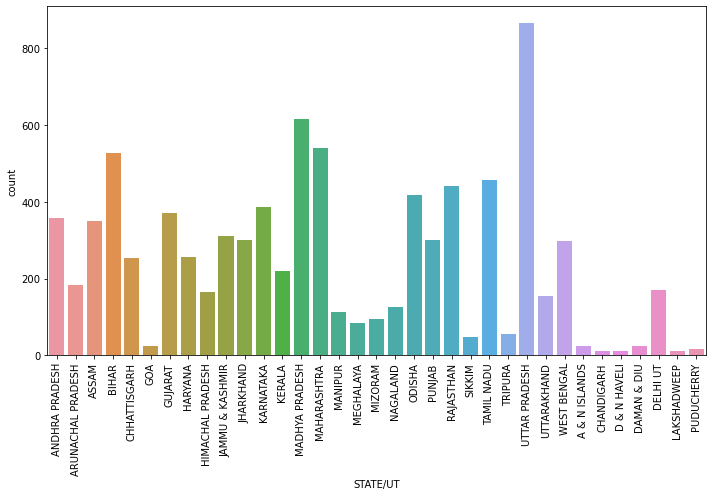

Countplot for YEAR column:->


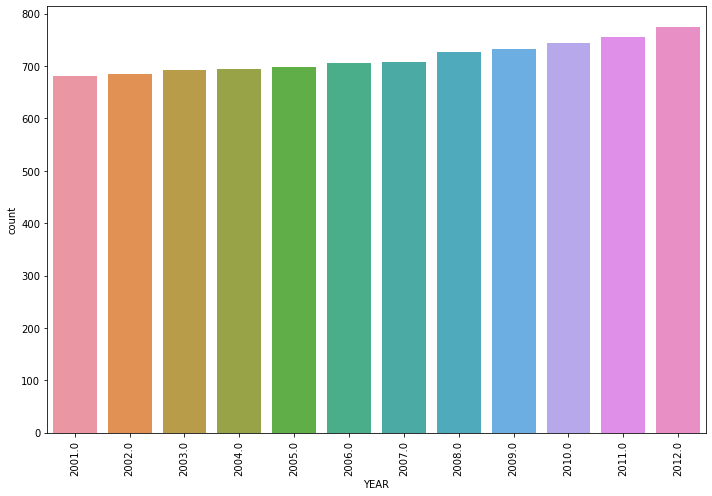

In [49]:


for i in sensitivearea[col1]:
    print("Countplot for {} column:->".format(i))
    generate_countplot(df[i])

-  States like GOA,TRIPURA, MIZORAM,Sikkim are showing very less rows taht means these states are safe as compare to other States.

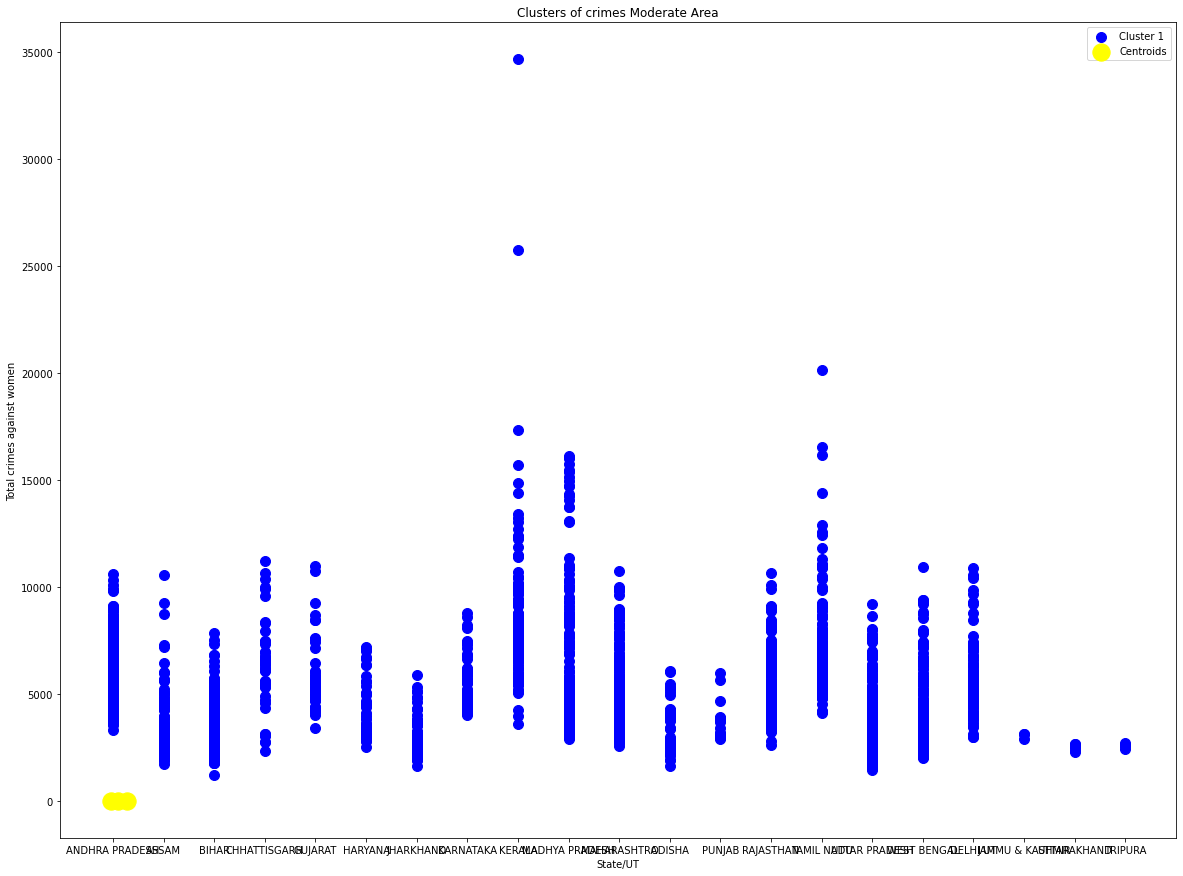

In [50]:
plt.figure(figsize=(20,15))
plt.scatter(moderatearea['STATE/UT'], moderatearea['TOTAL IPC CRIMES'], s = 100, c = 'blue', label = 'Cluster 1'),#hue=data2['STATE/UT'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of crimes Moderate Area')
plt.xlabel('State/UT')
plt.ylabel('Total crimes against women')
plt.legend()
plt.show()


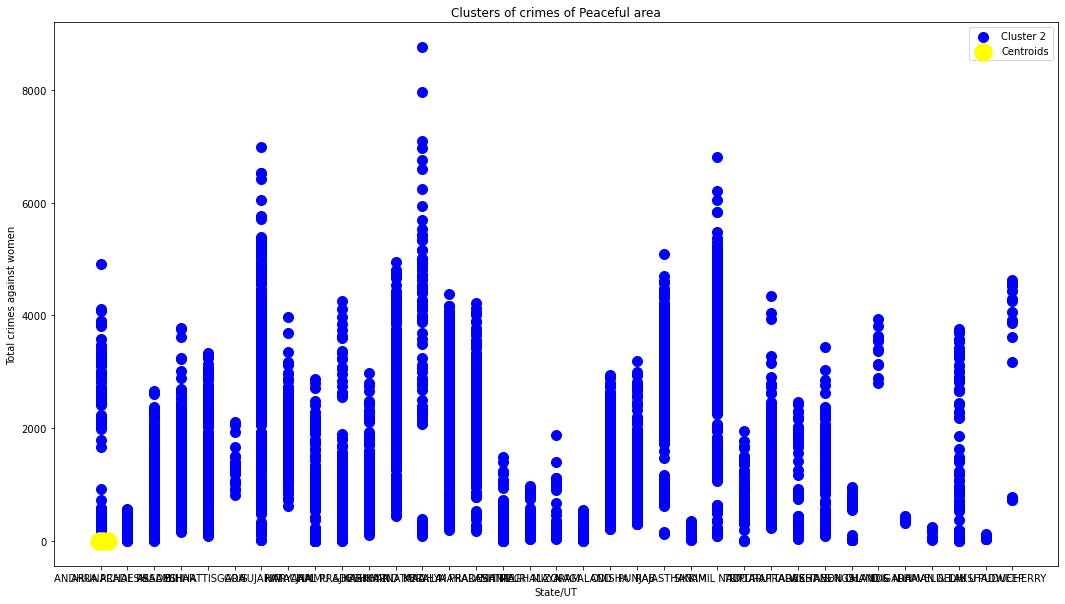

In [51]:
plt.figure(figsize=(18,10))
plt.scatter(peacefularea['STATE/UT'], peacefularea['TOTAL IPC CRIMES'], s = 100, c = 'blue', label = 'Cluster 2'),#hue=data2['STATE/UT'])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of crimes of Peaceful area')
plt.xlabel('State/UT')
plt.ylabel('Total crimes against women')
plt.legend()
plt.show()

In [52]:
from sklearn.metrics import silhouette_score

###  4.3 Analyse your clusters and prepare a report that explains all your observations.

### Analysis of Sensitive Area

In [54]:
pd.pivot_table(sensitivearea, values =['MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS',  'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'Total crimes against women', 'Total crimes against children',
       'Total crimes against SCs', 'Total crimes against STs'], index =['STATE/UT','DISTRICT', 'YEAR'],
                          aggfunc = max)
#Pivot table representation of a particular crime by 'Year' and 'State' features

ARSON  ATTEMPT TO MURDER  AUTO THEFT  \
STATE/UT       DISTRICT    YEAR                                           
ANDHRA PRADESH CYBERABAD   2005.0   37.0               88.0       563.0   
                           2006.0   43.0               92.0       642.0   
                           2007.0   74.0               84.0      1124.0   
                           2008.0   42.0               66.0      1202.0   
                           2009.0   71.0               84.0      1365.0   
...                                  ...                ...         ...   
WEST BENGAL    MURSHIDABAD 2010.0   54.0              620.0       204.0   
                           2011.0   45.0              637.0       186.0   
                           2012.0   50.0              395.0       309.0   
               NADIA       2011.0   13.0              375.0       243.0   
                           2012.0   22.0              357.0       244.0   

                                   BURGLARY  CAUSING DEATH BY NEGLIGENCE  \
STATE/UT       DISTRICT    YEAR                                            
ANDHRA PRADESH CYBERABAD   2005.0    1139.0                        898.0   
                           2006.0    1321.0                       1064.0   
                           2007.0    1165.0                       1188.0   
                           2008.0    1319.0                       1166.0   
                           2009.0    1348.0                       1063.0   
...                                     ...                          ...   
WEST BENGAL    MURSHIDABAD 2010.0       7.0                        311.0   
                           2011.0      13.0                        290.0   
                           2012.0       4.0                        347.0   
               NADIA       2011.0      20.0                        156.0   
                           2012.0      21.0                        285.0   

                                   CHEATING  COUNTERFIETING  \
STATE/UT       DISTRICT    YEAR                               
ANDHRA PRADESH CYBERABAD   2005.0     950.0             5.0   
                           2006.0    1275.0             6.0   
                           2007.0    1192.0             5.0   
                           2008.0    1183.0             6.0   
                           2009.0    1174.0            13.0   
...                                     ...             ...   
WEST BENGAL    MURSHIDABAD 2010.0     170.0            30.0   
                           2011.0     189.0            27.0   
                           2012.0     157.0           110.0   
               NADIA       2011.0     291.0            11.0   
                           2012.0     338.0            21.0   

                                   CRIMINAL BREACH OF TRUST  \
STATE/UT       DISTRICT    YEAR                               
ANDHRA PRADESH CYBERABAD   2005.0                      83.0   
                           2006.0                     156.0   
                           2007.0                     103.0   
                           2008.0                     103.0   
                           2009.0                     124.0   
...                                                     ...   
WEST BENGAL    MURSHIDABAD 2010.0                      54.0   
                           2011.0                      96.0   
                           2012.0                      92.0   
               NADIA       2011.0                      99.0   
                           2012.0                     132.0   

                                   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  \
STATE/UT       DISTRICT    YEAR                                                
ANDHRA PRADESH CYBERABAD   2005.0                                       10.0   
                           2006.0                                       11.0   
                           2007.0                                        8.0   
                           200

In [55]:
print("We have {} Rows and {} Columns in our dataframe Sensitive Area ".format(sensitivearea.shape[0], sensitivearea.shape[1]))


We have 140 Rows and 33 Columns in our dataframe Sensitive Area 


In [60]:
tot_murder= sensitivearea['MURDER'].sum()
tot_rape= sensitivearea['RAPE'].sum()
tot_dowrydeaths = sensitivearea['DOWRY DEATHS'].sum()

tot_riots=sensitivearea['RIOTS'].sum()
tot_kidnap= sensitivearea['KIDNAPPING & ABDUCTION'].sum()
tot_dacoity= sensitivearea['DACOITY'].sum()
tot_robbery = sensitivearea['ROBBERY'].sum()
tot_burglary= sensitivearea['BURGLARY'].sum()
tot_theft= sensitivearea['THEFT'].sum()
tot_crimes_against_women = sensitivearea['Total crimes against women'].sum()
tot_crimes_against_STs = sensitivearea['Total crimes against STs'].sum()
tot_crimes_against_SCs = sensitivearea['Total crimes against SCs'].sum()
tot_crimes_against_children = sensitivearea['Total crimes against children'].sum()


crime_group = ['TOTAL Murder','TOTAL rape','Total Dowry Deaths','Total Kidnapping','TOTAL Dacoity','Total Robbery','TOtal Burglary','Total Theft','Total Riots',
                'Total Crimes Against Women','Total Crimes Against SC','Total Crimes against STs','Total Crimes Against Children']
values = [tot_murder,tot_rape,tot_dowrydeaths,tot_kidnap,tot_dacoity,tot_robbery,tot_burglary,
          tot_theft,tot_riots,tot_crimes_against_women,tot_crimes_against_STs,tot_crimes_against_SCs,tot_crimes_against_children]

colors = ['crimson','gold','green','yellow','blue','black']

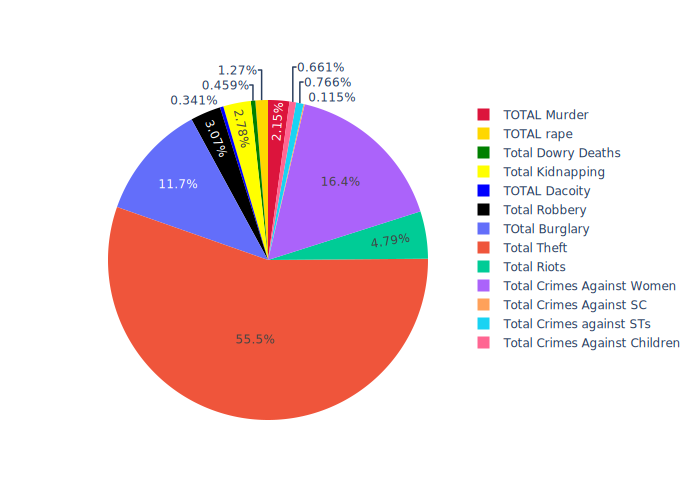

In [62]:
fig = go.Figure(data=[go.Pie(labels=crime_group, values=values,sort=False,
                            marker=dict(colors=colors),textfont_size=12)])

fig.show(renderer='svg')

- Total crimes against SCs share the less share of crimes (0.878%) and Total theft is 37.1% 

In [63]:
sensitivearea['STATE/UT'].value_counts()

WEST BENGAL       28
MAHARASHTRA       25
ANDHRA PRADESH    20
UTTAR PRADESH     13
BIHAR             12
GUJARAT           12
KARNATAKA         12
RAJASTHAN          6
MADHYA PRADESH     6
DELHI UT           4
TAMIL NADU         2
Name: STATE/UT, dtype: int64

__Total States /UT
- 11 States showing that are higher in crimes specially TOTAL IPC CRIMES ,Total Crime against Women and TOTAL Crime against STs/SCs

### Reason for higher crimes in thses states-

__ West Bengal, Maharashtra, Andhra Pradesh, Rajasthan , Uttar Pradesh are Large in Area so that is the reason for higher crimes in thees states as they are over populated States.

- Literacy Rate should be higher for less crimes .
- 

In [64]:
sensitivearea['DISTRICT'].value_counts()

HYDERABAD CITY       12
AHMEDABAD COMMR.     12
BANGALORE COMMR.     12
PATNA                12
KOLKATA               9
CYBERABAD             8
LUCKNOW               8
PUNE COMMR.           8
MUMBAI COMMR.         7
24 PARGANAS NORTH     6
INDORE                6
24 PARGANAS SOUTH     6
THANE COMMR.          5
JAIPUR                5
MUMBAI                5
MURSHIDABAD           4
NORTH-WEST            2
NADIA                 2
AGRA                  2
CHENNAI               2
GHAZIABAD             2
SOUTH                 1
JALPAIGURI            1
KANPUR NAGAR          1
NORTH WEST            1
ALWAR                 1
Name: DISTRICT, dtype: int64

In [68]:
sensitivearea_dis=sensitivearea.groupby('DISTRICT')

In [114]:
sensitivearea_dis.first()

STATE/UT    YEAR  MURDER  ATTEMPT TO MURDER  \
DISTRICT                                                               
24 PARGANAS NORTH     WEST BENGAL  2006.0   154.0               82.0   
24 PARGANAS SOUTH     WEST BENGAL  2007.0   158.0              123.0   
AGRA                UTTAR PRADESH  2011.0   181.0              182.0   
AHMEDABAD COMMR.          GUJARAT  2001.0    90.0               58.0   
ALWAR                   RAJASTHAN  2012.0   100.0               88.0   
BANGALORE COMMR.        KARNATAKA  2001.0   221.0              327.0   
CHENNAI                TAMIL NADU  2011.0   168.0              332.0   
CYBERABAD          ANDHRA PRADESH  2005.0   150.0               88.0   
GHAZIABAD           UTTAR PRADESH  2009.0   254.0              277.0   
HYDERABAD CITY     ANDHRA PRADESH  2001.0   111.0              113.0   
INDORE             MADHYA PRADESH  2007.0   111.0              151.0   
JAIPUR                  RAJASTHAN  2001.0    91.0               90.0   
JALPAIGURI            WEST BENGAL  2008.0   126.0              134.0   
KANPUR NAGAR        UTTAR PRADESH  2008.0   168.0              114.0   
KOLKATA               WEST BENGAL  2001.0    65.0              152.0   
LUCKNOW             UTTAR PRADESH  2005.0   194.0              156.0   
MUMBAI                MAHARASHTRA  2001.0   295.0              200.0   
MUMBAI COMMR.         MAHARASHTRA  2006.0   239.0              135.0   
MURSHIDABAD           WEST BENGAL  2009.0   184.0              607.0   
NADIA                 WEST BENGAL  2011.0   136.0              375.0   
NORTH WEST               DELHI UT  2001.0   134.0              107.0   
NORTH-WEST               DELHI UT  2005.0   128.0              121.0   
PATNA                       BIHAR  2001.0   434.0              581.0   
PUNE COMMR.           MAHARASHTRA  2005.0   106.0               85.0   
SOUTH                    DELHI UT  2001.0    83.0               75.0   
THANE COMMR.          MAHARASHTRA  2008.0    99.0               76.0   

                   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   RAPE  \
DISTRICT                                                              
24 PARGANAS NORTH                                       39.0  174.0   
24 PARGANAS SOUTH                                       48.0  205.0   
AGRA                                                    38.0   76.0   
AHMEDABAD COMMR.                                        60.0   39.0   
ALWAR                                                    7.0  129.0   
BANGALORE COMMR.                                         5.0   40.0   
CHENNAI                                                  1.0   76.0   
CYBERABAD                                               10.0   44.0   
GHAZIABAD                                               31.0   53.0   
HYDERABAD CITY                                           7.0   37.0   
INDORE                                                   4.0  102.0   
JAIPUR                                                   6.0   61.0   
JALPAIGURI                                              44.0  334.0   
KANPUR NAGAR                                            39.0   72.0   
KOLKATA                                                  8.0   19.0   
LUCKNOW                                                 38.0   51.0   
MUMBAI                                                   6.0  127.0   
MUMBAI COMMR.                                            5.0  165.0   
MURSHIDABAD                                             53.0  568.0   
NADIA                                                   26.0  185.0   
NORTH WEST                                              13.0  103.0   
NORTH-WEST                                              18.0  190.0   
PATNA                                                   30.0   27.0   
PUNE COMMR.                                              7.0   79.0   
SOUTH                                                    7.0   65.0   
THANE COMMR.                                             2.0   74.0   

                   

In [70]:
sensitivearea.describe().T

count          mean          std  \
YEAR                                       140.0   2007.571429     3.403644   
MURDER                                     140.0    172.950000    90.562854   
ATTEMPT TO MURDER                          140.0    163.735714   134.672884   
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  140.0     19.385714    30.049021   
RAPE                                       140.0    102.200000    89.961239   
CUSTODIAL RAPE                             140.0      0.007143     0.084515   
OTHER RAPE                                 140.0    102.192857    89.964493   
KIDNAPPING & ABDUCTION                     140.0    224.200000   133.394973   
KIDNAPPING AND ABDUCTION OF OTHERS         140.0     77.864286    72.962907   
DACOITY                                    140.0     27.492857    28.432552   
PREPARATION AND ASSEMBLY FOR DACOITY       140.0     46.635714    82.024405   
ROBBERY                                    140.0    247.642857   227.099923   
BURGLARY                                   140.0    942.285714   772.866460   
THEFT                                      140.0   4470.171429  3008.071064   
AUTO THEFT                                 140.0   1920.578571  1362.919170   
OTHER THEFT                                140.0   2549.592857  2005.365683   
RIOTS                                      140.0    385.714286   427.964822   
CRIMINAL BREACH OF TRUST                   140.0    185.164286   140.501804   
CHEATING                                   140.0    944.592857   742.796426   
COUNTERFIETING                             140.0     32.685714    35.507439   
ARSON                                      140.0     21.035714    21.786872   
HURT/GREVIOUS HURT                         140.0   1934.692857  1462.693578   
DOWRY DEATHS                               140.0     37.000000    26.206979   
CAUSING DEATH BY NEGLIGENCE                140.0    427.578571   311.994929   
OTHER IPC CRIMES                           140.0   5565.171429  3099.618273   
TOTAL IPC CRIMES                           140.0  16985.200000  6818.138133   
Total crimes against women                 140.0   1320.400000   906.777461   
Total crimes against children              140.0     53.214286    89.923372   
Total crimes against SCs                   140.0     61.685714    63.342405   
Total crimes against STs                   140.0      9.278571    17.939975   
cluster                                    140.0      3.000000     0.000000   

                                              min       25%      50%  \
YEAR                                       2001.0   2005.00   2008.0   
MURDER                                       37.0    110.00    148.0   
ATTEMPT TO MURDER                             2.0     86.00    123.5   
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER     0.0      4.75      8.0   
RAPE                                         12.0     48.75     70.0   
CUSTODIAL RAPE                                0.0      0.00      0.0   
OTHER RAPE                                   12.0     48.75     70.0   
KIDNAPPING & ABDUCTION                       36.0    127.25    181.5   
KIDNAPPING AND ABDUCTION OF OTHERS            0.0     32.75     59.0   
DACOITY                                       0.0     11.00     20.5   
PREPARATION AND ASSEMBLY FOR DACOITY          0.0      2.00     18.5   
ROBBERY                                      18.0     77.50    171.0   
BURGLARY                                      4.0    447.00    812.5   
THEFT                                       857.0   2587.00   3689.0   
AUTO THEFT                                  166.0    941.75   1674.0   
OTHER THEFT                                 229.0   1202.75   1888.0   
RIOTS                                         8.0    166.50    278.5   
CRIMINAL BREACH OF TRUST                      4.0     81.75    154.0   
CHEATING                                     93.0    290.25    769.0   
COUNTERFIETING                                1.0      9.00     19.0   
AR

__When we observed describe method for whole dataset, I mentioned that Maximum vaues fr each column will fall in sensitive are , which we can see here clearly__

## Plotting Bar plot for state vs Total  IPC CRIME

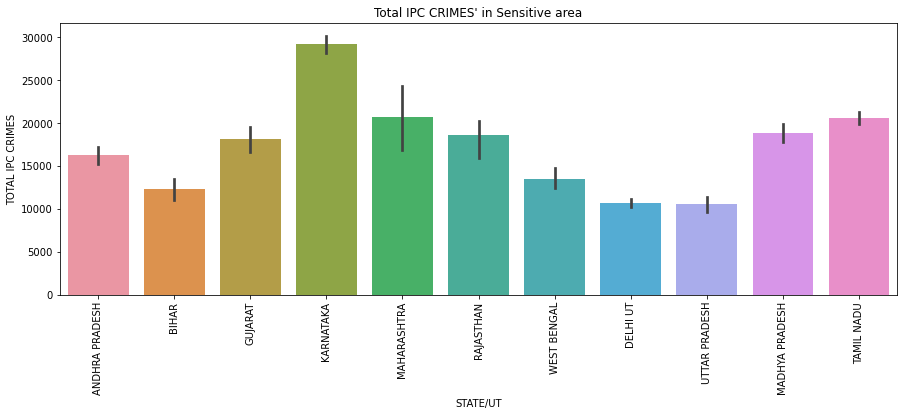

In [71]:
plt.figure(figsize=(15, 5))
sns.barplot(x='STATE/UT', y='TOTAL IPC CRIMES',data=sensitivearea)
plt.xticks(rotation='90')
plt.title("Total IPC CRIMES' in Sensitive area")
plt.show()

IPC CRIMES were mostly occured in KARNATAKA, MAHARASHTRA AND Tamil Nadu- IPC CRIMES i.e. murder, attempt to murder, culpable homicide, dowry death, kidnapping and abduction, COmes under IPC CRIMES so THESE are the states WHere MURDER, murder, attempt to murder, culpable homicide, dowry death, kidnapping and abduction, MUrders are happening the most.

__Checking for DISTRICTS as well__

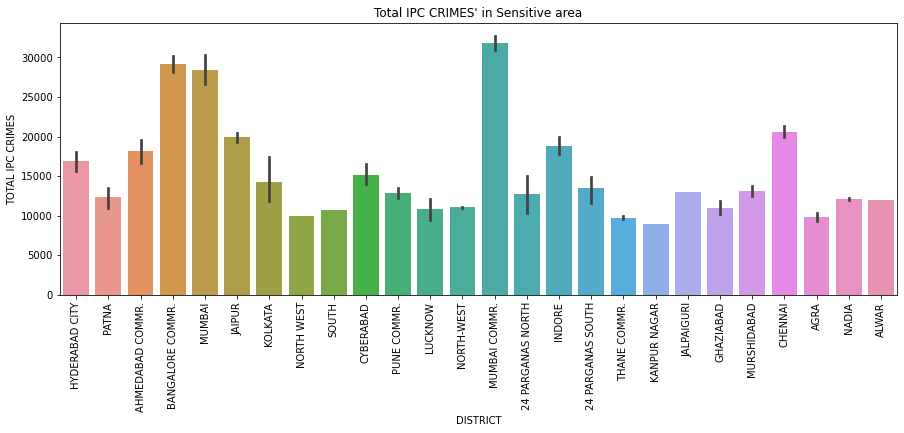

In [118]:
plt.figure(figsize=(15, 5))
sns.barplot(x='DISTRICT', y='TOTAL IPC CRIMES',data=sensitivearea)
plt.xticks(rotation='90')
plt.title("Total IPC CRIMES' in Sensitive area")
plt.savefig('IPC CRIMES in Sensitive area.jpg')
plt.show()

__MUMBAI COmmercial , AHEMDABAD COMMERCIAL BANGALORE COmmercial are the top 3 DISTRICTS which have maximum IPC CRIMES_
These all area the commercial area of states.__

- 

### SImilarly for DIstrics VS Total crimes agianst Women

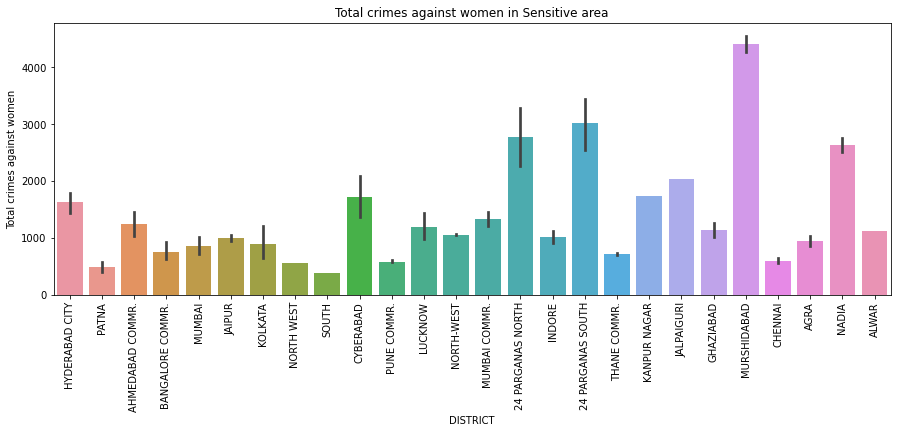

In [119]:
plt.figure(figsize=(15, 5))
sns.barplot(x='DISTRICT', y='Total crimes against women',data=sensitivearea)
plt.xticks(rotation='90')
plt.title("Total crimes against women in Sensitive area")

plt.savefig('Total crimes against women in Sensitive area.jpg')
plt.show()

__Top 3 district are Murshidabad,24 Parganas South,24 Parganas South AND all these districts are in West Bengal which means for women West Bengal is not safe at all__


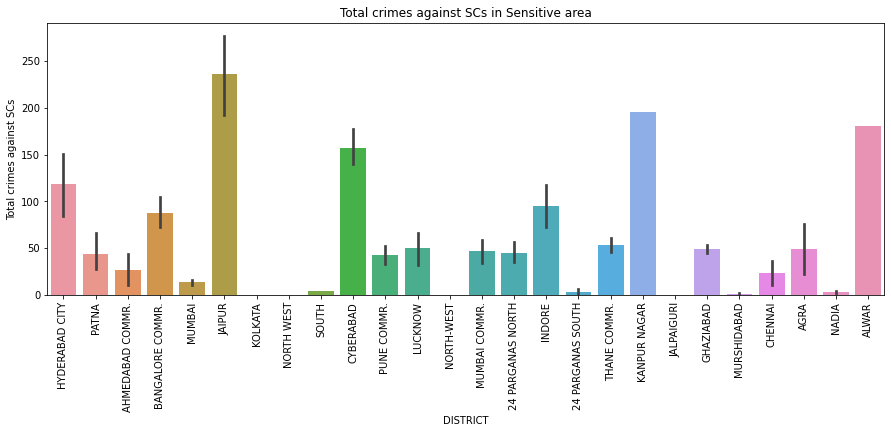

In [120]:
plt.figure(figsize=(15, 5))
sns.barplot(x='DISTRICT', y='Total crimes against SCs',data=sensitivearea)
plt.xticks(rotation='90')
plt.title("Total crimes against SCs in Sensitive area")
plt.savefig('Total crimes against SCs in Sensitive area')
plt.show()


__Jaipur,Alwar both district are in Rajasthan State ,Kanpur Nagar in Uttar Pradesh has highest crimes agains SCs in India__

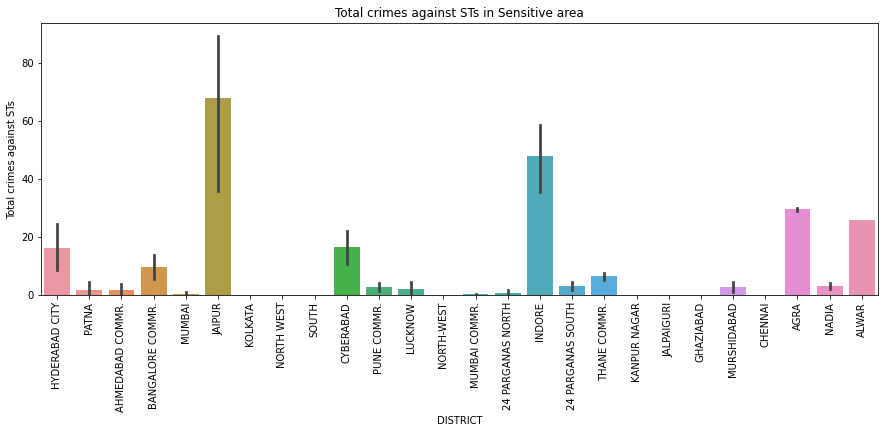

In [121]:
plt.figure(figsize=(15, 5))
sns.barplot(x='DISTRICT', y='Total crimes against STs',data=sensitivearea)
plt.xticks(rotation='90')
plt.title("Total crimes against STs in Sensitive area")
plt.savefig('Total crimes against STs in Sensitive area')
plt.show()

__Jaipur  district of Rajasthan, Indore District of Madhya Pradesh and Agra , Uttar Pradesh has higher crimes against STs__

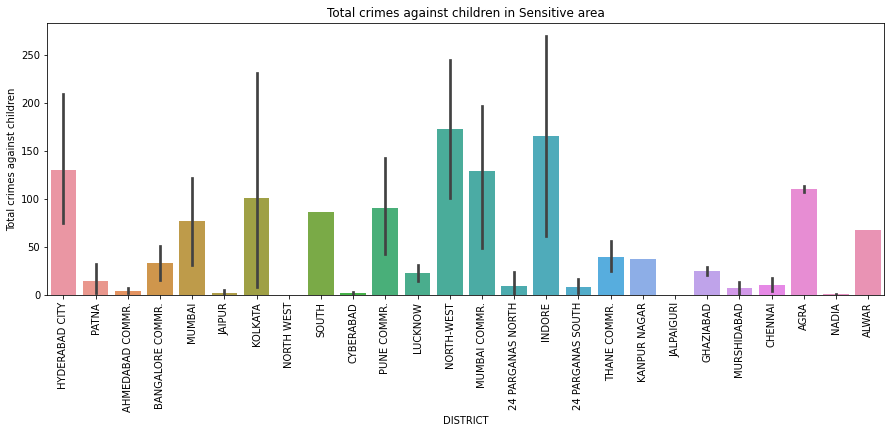

In [122]:
plt.figure(figsize=(15, 5))
sns.barplot(x='DISTRICT', y='Total crimes against children',data=sensitivearea)
plt.xticks(rotation='90')
plt.title("Total crimes against children in Sensitive area")
plt.savefig('Total crimes against children in Sensitive area')

plt.show()

__Nort-West District of DELHI , Indore, Hydrabad City has the higher  Crimes agianst Children__

The States like __Rajasthan, MAdhya Pradesh , Uttar Pradesh, Maharashtra__ are the largest states in india .. This is one of the main reason for highest crime rate in these states.


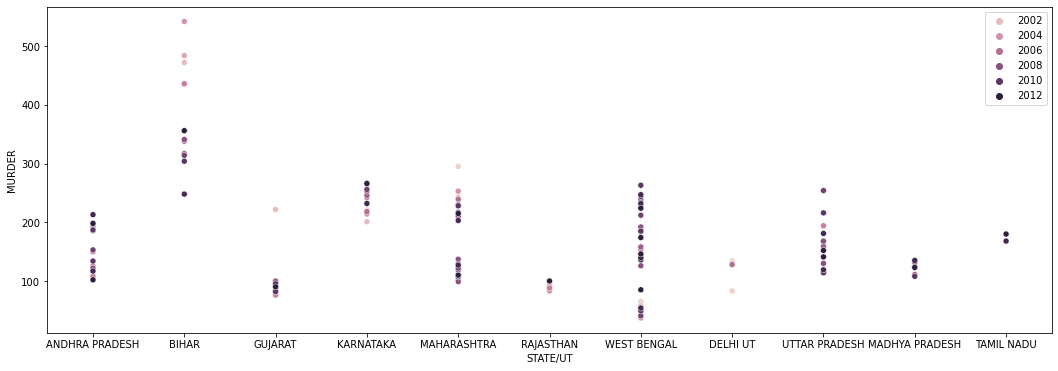

In [81]:
plt.figure(figsize=(18,6))
sns.scatterplot(x = "STATE/UT", y = "MURDER", data = sensitivearea,hue='YEAR')
plt.legend()
#plt.tight_layout()
plt.show()

__Bihar had Highsest cases of  MURDER Cases in 2004 year

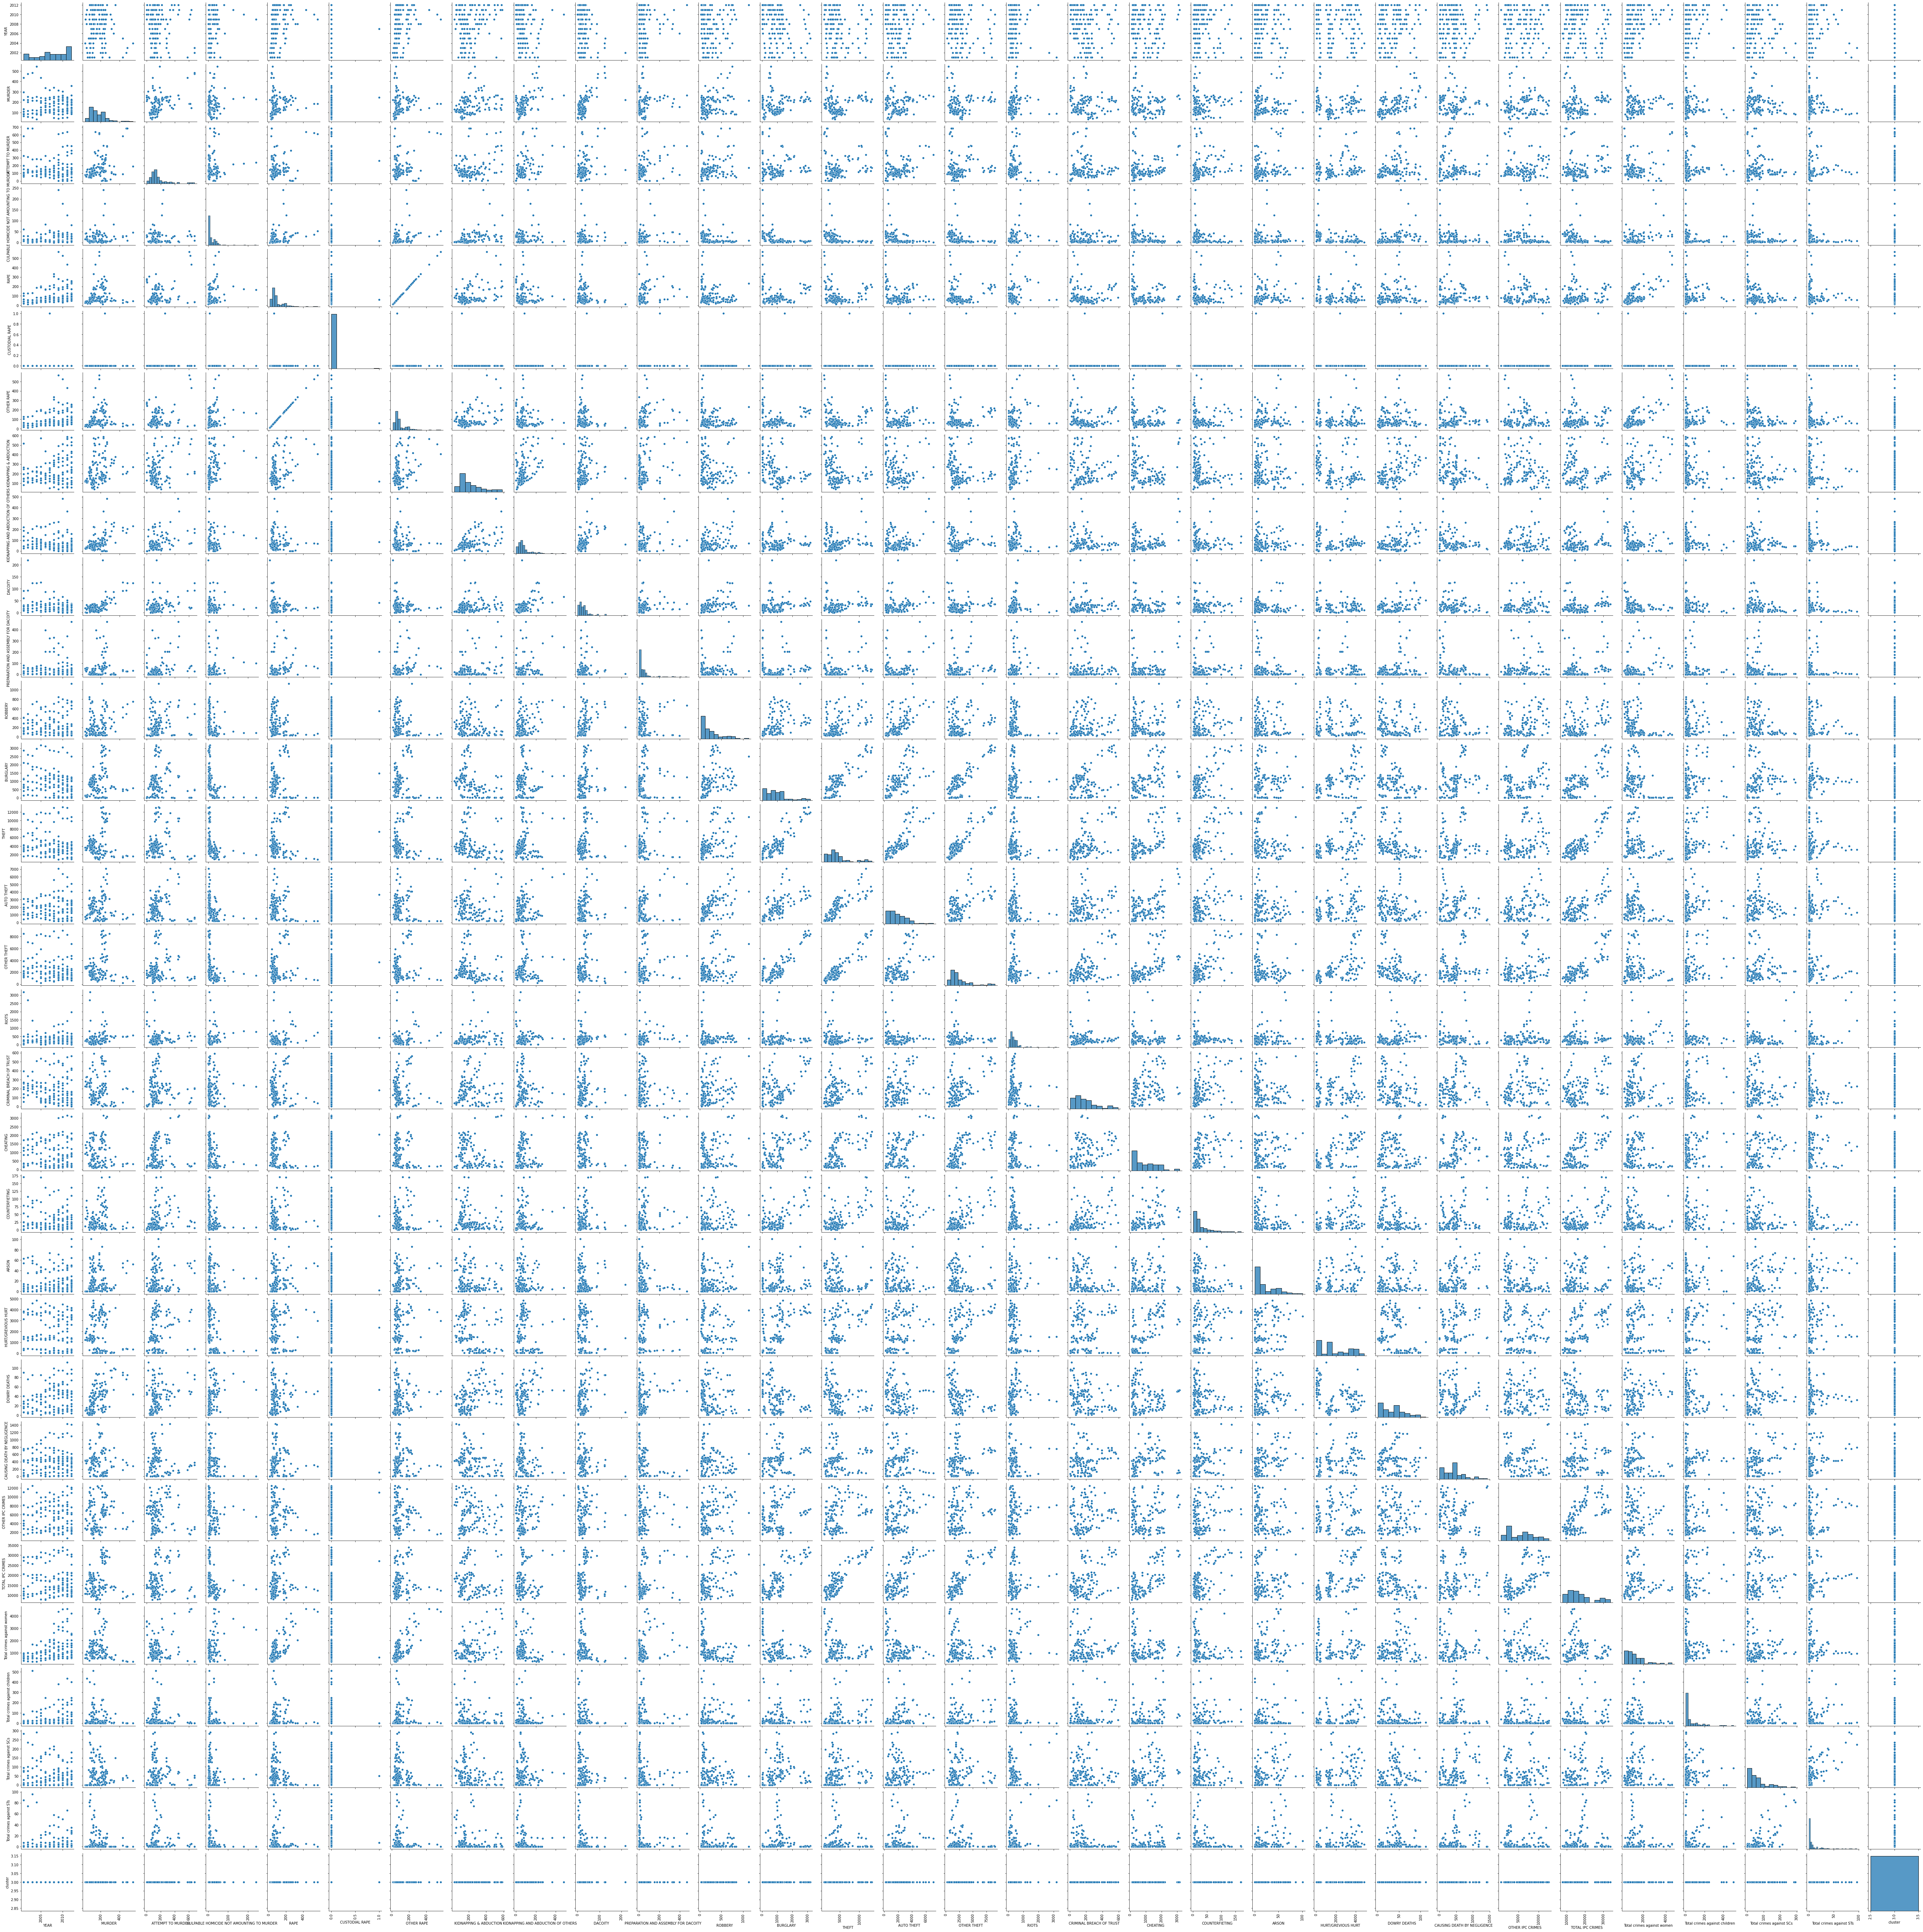

In [104]:

g = sns.pairplot(sensitivearea[['']])
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

__From years 2001 to 2012 , lets check the trend for each type of crime__

Text(0, 0.5, 'Cases of INSULT TO MODESTY OF WOMEN in India')

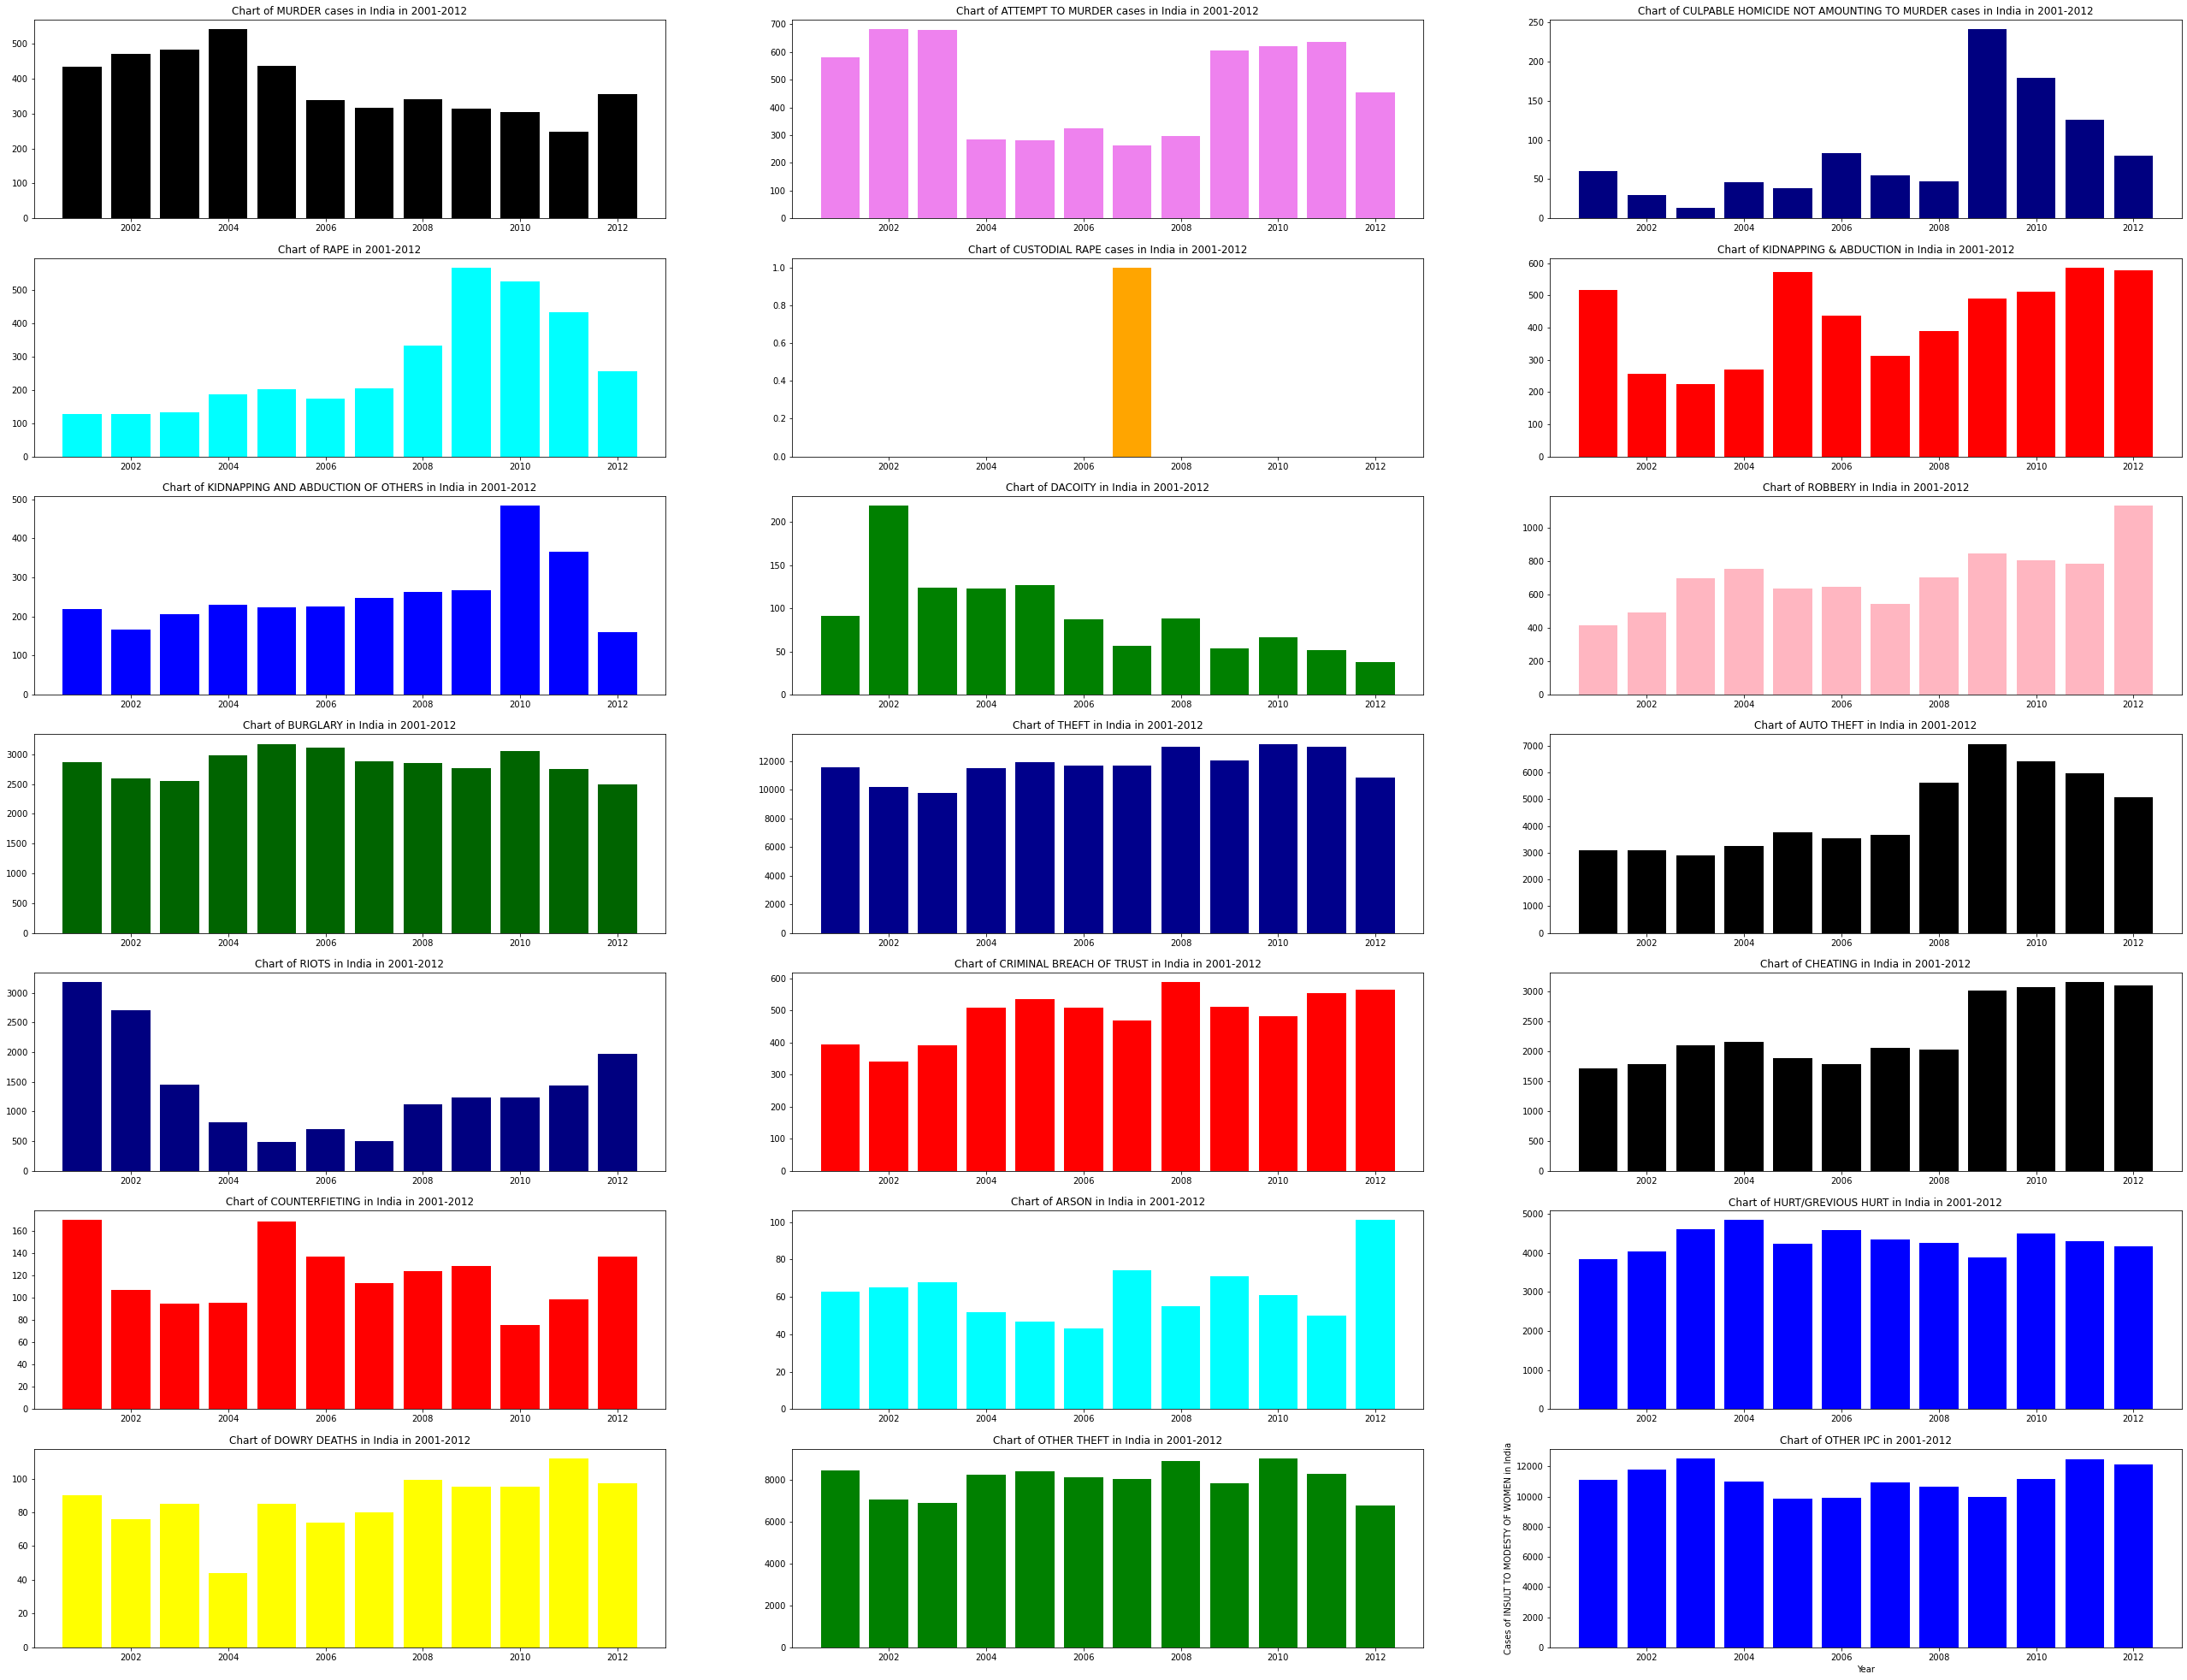

In [75]:
fig, axes = plt.subplots(7, 3, figsize=(45, 35))

axes[0,0].set_title("Chart of MURDER cases in India in 2001-2012")
axes[0,0].bar(sensitivearea['YEAR'], sensitivearea['MURDER'], color = 'black');
plt.xlabel('YEAR') #X-axis
plt.ylabel('Cases of MURDER in India') #Y-axis

axes[0,1].set_title("Chart of ATTEMPT TO MURDER cases in India in 2001-2012")
axes[0,1].bar(sensitivearea['YEAR'], sensitivearea['ATTEMPT TO MURDER'], color = 'violet');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of ATTEMPT TO MURDER in India') #Y-axis

axes[0,2].set_title("Chart of CULPABLE HOMICIDE NOT AMOUNTING TO MURDER cases in India in 2001-2012")
axes[0,2].bar(sensitivearea['YEAR'], sensitivearea['CULPABLE HOMICIDE NOT AMOUNTING TO MURDER'], color = 'navy');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of CULPABLE HOMICIDE NOT AMOUNTING TO MURDER in India') #Y-axis

axes[1,0].set_title("Chart of RAPE in 2001-2012")
axes[1,0].bar(sensitivearea['YEAR'], sensitivearea['RAPE'], color = 'cyan');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of RAPE in India') #Y-axis

axes[1,1].set_title("Chart of CUSTODIAL RAPE cases in India in 2001-2012")
axes[1,1].bar(sensitivearea['YEAR'], sensitivearea['CUSTODIAL RAPE'], color = 'orange');
plt.xlabel('YEAR') #X-axis
plt.ylabel('Cases of CUSTODIAL RAPE in India') #Y-axis

axes[1,2].set_title("Chart of KIDNAPPING & ABDUCTION in India in 2001-2012")
axes[1,2].bar(sensitivearea['YEAR'], sensitivearea['KIDNAPPING & ABDUCTION'], color = 'red');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of KIDNAPPING & ABDUCTION in India') #Y-axis

axes[2,0].set_title("Chart of KIDNAPPING AND ABDUCTION OF OTHERS in India in 2001-2012")
axes[2,0].bar(sensitivearea['YEAR'], sensitivearea['KIDNAPPING AND ABDUCTION OF OTHERS'], color = 'blue');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of KIDNAPPING AND ABDUCTION OF OTHERSin India') #Y-axis


axes[2,1].set_title("Chart of DACOITY in India in 2001-2012")
axes[2,1].bar(sensitivearea['YEAR'], sensitivearea['DACOITY'], color = 'green');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of DACOITY in India') #Y-axis

axes[2,2].set_title("Chart of ROBBERY in India in 2001-2012")
axes[2,2].bar(sensitivearea['YEAR'], sensitivearea['ROBBERY'], color = 'lightpink');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of ROBBERY in India') #Y-axis

axes[3,0].set_title("Chart of BURGLARY in India in 2001-2012")
axes[3,0].bar(sensitivearea['YEAR'], sensitivearea['BURGLARY'], color = 'darkgreen');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of BURGLARY in India') #Y-axis


axes[3,1].set_title("Chart of THEFT in India in 2001-2012")
axes[3,1].bar(sensitivearea['YEAR'], sensitivearea['THEFT'], color = 'darkblue');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of THEFT in India') #Y-axis



axes[3,2].set_title("Chart of AUTO THEFT in India in 2001-2012")
axes[3,2].bar(sensitivearea['YEAR'], sensitivearea['AUTO THEFT'], color = 'black');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of AUTO THEFT in India') #Y-axis


axes[4,0].set_title("Chart of RIOTS in India in 2001-2012")
axes[4,0].bar(sensitivearea['YEAR'], sensitivearea['RIOTS'], color = 'navy');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of RIOTS') #Y-axis

axes[4,1].set_title("Chart of CRIMINAL BREACH OF TRUST in India in 2001-2012")
axes[4,1].bar(sensitivearea['YEAR'], sensitivearea['CRIMINAL BREACH OF TRUST'], color = 'red');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of CRIMINAL BREACH OF TRUST in India') #Y-axis


axes[4,2].set_title("Chart of CHEATING in India in 2001-2012")
axes[4,2].bar(sensitivearea['YEAR'], sensitivearea['CHEATING'], color = 'black');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of CHEATING in India') #Y-axis

axes[5,0].set_title("Chart of COUNTERFIETING in India in 2001-2012")
axes[5,0].bar(sensitivearea['YEAR'], sensitivearea['COUNTERFIETING'], color = 'red');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of COUNTERFIETING in India') #Y-axis

axes[5,1].set_title("Chart of ARSON in India in 2001-2012")
axes[5,1].bar(sensitivearea['YEAR'], sensitivearea['ARSON'], color = 'cyan');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of ARSON in India') #Y-axis


axes[5,2].set_title("Chart of HURT/GREVIOUS HURT in India in 2001-2012")
axes[5,2].bar(sensitivearea['YEAR'], sensitivearea['HURT/GREVIOUS HURT'], color = 'blue');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of HURT/GREVIOUS HURT in India') #Y-axis

axes[6,0].set_title("Chart of DOWRY DEATHS in India in 2001-2012")
axes[6,0].bar(sensitivearea['YEAR'], sensitivearea['DOWRY DEATHS'], color = 'yellow');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of DOWRY DEATHS in India') #Y-axis

axes[6,1].set_title("Chart of OTHER THEFT in India in 2001-2012")
axes[6,1].bar(sensitivearea['YEAR'], sensitivearea['OTHER THEFT'], color = 'green');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of OTHER THEFT in India') #Y-axis

axes[6,2].set_title("Chart of OTHER IPC in 2001-2012")
axes[6,2].bar(sensitivearea['YEAR'], sensitivearea['OTHER IPC CRIMES'], color = 'blue');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of INSULT TO MODESTY OF WOMEN in India') #Y-axis

In [ ]:
## Checking Correlationship in Sensitive rea dataframe

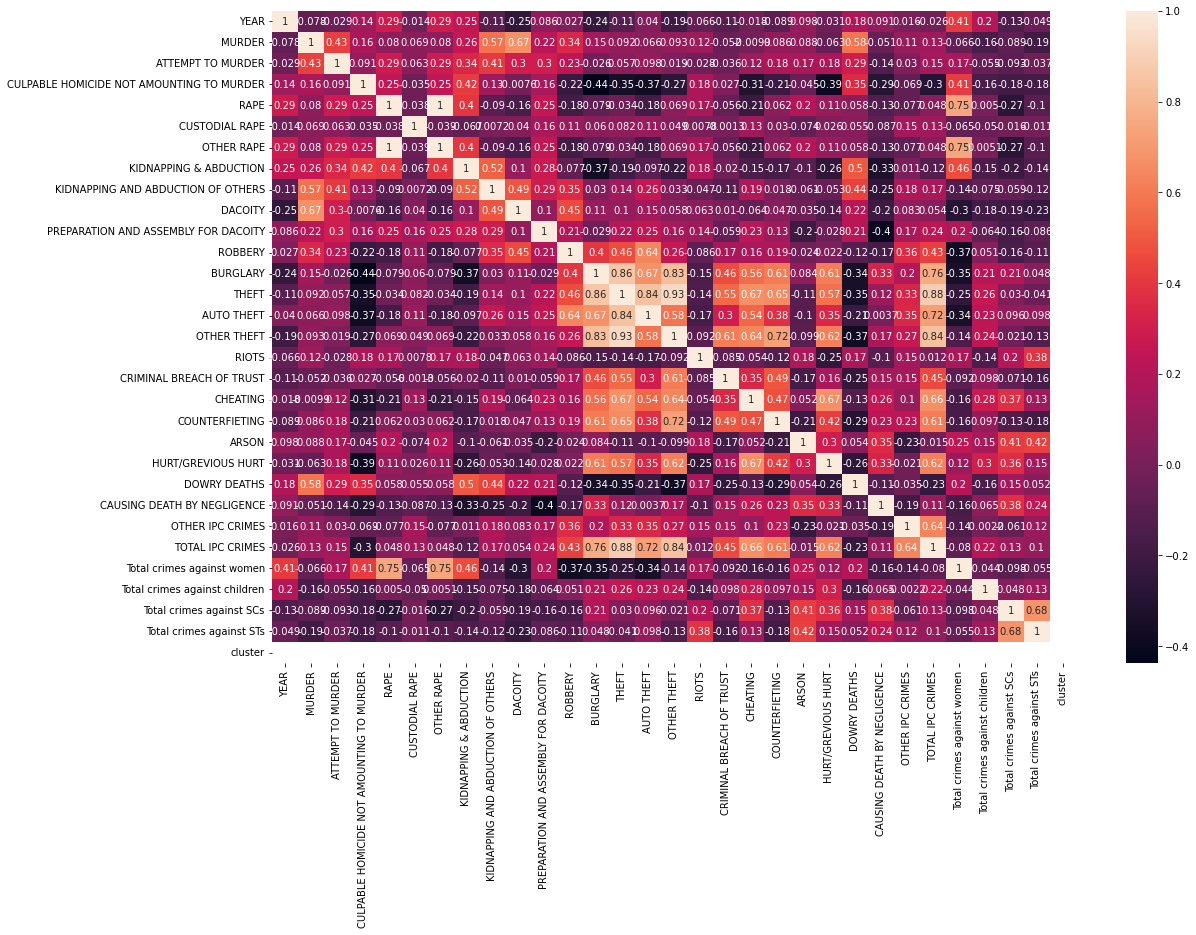

In [123]:
plt.figure(figsize=(18,12))
sns.heatmap(sensitivearea.corr(),annot=True)
plt.savefig('heatmap2.jpg')
plt.show()

The heatmap is created using seaborn to observe the correlation between the variables. The created correlation matrix shows the single correlation between each feature with other features on the dataset.

If 2 variables are correlated to each other by:

- 0.0 to 0.3, they are weakly correlated,

- 0.3 to 0.6, they are moderately correlated,

- 0.6 to 0.9, they are strongly correlated,

- finally, >0.9, they are very strongly correlated

Positive and negative indicates whether the variables are directly or inversely related e.g. a correlation of -0.7 between 2 variables denote that if one variable increases, the other decreases strongly (as defined in the list above)

__From above heat map we can clerly see that all the categories of crimes like Murder,Rape , Dowry Deaths are positively correlated with TOTAL IPC CRIMES__

__KIdnapping and Abduction and Other Rape/Rape are also positvely correlated__

- Crime against STs and Crime Against SCs are also positive correalted

## Analysis of Moderate Area

In [76]:
pd.pivot_table(moderatearea, values =['MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS',  'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'Total crimes against women', 'Total crimes against children',
       'Total crimes against SCs', 'Total crimes against STs'], index =['STATE/UT','DISTRICT', 'YEAR'],
                          aggfunc = max)
#Pivot table representation of a particular crime by 'Year' and 'State' features

ARSON  ATTEMPT TO MURDER  AUTO THEFT  \
STATE/UT       DISTRICT       YEAR                                           
ANDHRA PRADESH ADILABAD       2001.0   30.0               60.0        22.0   
                              2002.0   38.0               79.0        32.0   
                              2003.0   42.0               65.0        35.0   
                              2004.0   30.0               83.0        46.0   
                              2005.0   30.0               48.0        53.0   
...                                     ...                ...         ...   
WEST BENGAL    UTTAR DINAJPUR 2008.0   17.0               98.0        53.0   
                              2009.0   11.0               86.0        89.0   
                              2010.0   10.0              106.0       114.0   
                              2011.0   20.0              178.0       119.0   
                              2012.0   33.0              283.0       129.0   

                                      BURGLARY  CAUSING DEATH BY NEGLIGENCE  \
STATE/UT       DISTRICT       YEAR                                            
ANDHRA PRADESH ADILABAD       2001.0     198.0                        181.0   
                              2002.0     193.0                        225.0   
                              2003.0     207.0                        248.0   
                              2004.0     177.0                        271.0   
                              2005.0     191.0                        276.0   
...                                        ...                          ...   
WEST BENGAL    UTTAR DINAJPUR 2008.0      10.0                          5.0   
                              2009.0       8.0                          2.0   
                              2010.0       4.0                          2.0   
                              2011.0      10.0                          7.0   
                              2012.0       7.0                          3.0   

                                      CHEATING  COUNTERFIETING  \
STATE/UT       DISTRICT       YEAR                               
ANDHRA PRADESH ADILABAD       2001.0     104.0             1.0   
                              2002.0     135.0             0.0   
                              2003.0     146.0             1.0   
                              2004.0     152.0             5.0   
                              2005.0     173.0             4.0   
...                                        ...             ...   
WEST BENGAL    UTTAR DINAJPUR 2008.0      20.0            10.0   
                              2009.0      40.0             6.0   
                              2010.0      34.0             2.0   
                              2011.0      33.0             3.0   
                              2012.0      64.0             6.0   

                                      CRIMINAL BREACH OF TRUST  \
STATE/UT       DISTRICT       YEAR                               
ANDHRA PRADESH ADILABAD       2001.0                      16.0   
                              2002.0                      25.0   
                              2003.0                      19.0   
                              2004.0                      34.0   
                              2005.0                      13.0   
...                                                        ...   
WEST BENGAL    UTTAR DINAJPUR 2008.0                      14.0   
                              2009.0                       9.0   
                              2010.0                       9.0   
                              2011.0                      16.0   
                              2012.0                      18.0   

                                      CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  \
STATE/UT       DISTRICT       YEAR                                                
ANDHRA PRADESH ADILABAD       2001.0                                       17.0   
                            

In [77]:
print("We have {} Rows and {} Columns in our dataframe Moderate Area ".format(moderatearea.shape[0], moderatearea.shape[1]))


We have 2350 Rows and 33 Columns in our dataframe Moderate Area 


In [78]:
moderatearea['STATE/UT'].value_counts()

UTTAR PRADESH      295
MADHYA PRADESH     242
ANDHRA PRADESH     241
MAHARASHTRA        238
BIHAR              233
RAJASTHAN          191
TAMIL NADU         135
KERALA             131
WEST BENGAL        128
ASSAM               90
DELHI UT            81
JHARKHAND           65
KARNATAKA           58
ODISHA              54
HARYANA             50
GUJARAT             43
CHHATTISGARH        43
PUNJAB              18
UTTARAKHAND          7
TRIPURA              4
JAMMU & KASHMIR      3
Name: STATE/UT, dtype: int64

In [79]:
moderatearea['DISTRICT'].value_counts()

WEST              16
ADILABAD          12
MALAPPURAM        12
JABALPUR          12
GWALIOR           12
                  ..
DEHRADUN           1
SRIKAKULAM         1
WARANGAL URBAN     1
DAMOH              1
CENTRAL            1
Name: DISTRICT, Length: 337, dtype: int64

In [80]:
moderatearea.describe().T

count         mean          std  \
YEAR                                       2350.0  2006.963404     3.523735   
MURDER                                     2350.0    82.932766    42.910767   
ATTEMPT TO MURDER                          2350.0    76.701702    61.455906   
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  2350.0     9.668511    13.323093   
RAPE                                       2350.0    51.312340    33.444430   
CUSTODIAL RAPE                             2350.0     0.007234     0.138220   
OTHER RAPE                                 2350.0    51.305106    33.435388   
KIDNAPPING & ABDUCTION                     2350.0    80.751489    68.542253   
KIDNAPPING AND ABDUCTION OF OTHERS         2350.0    21.211489    27.468221   
DACOITY                                    2350.0    12.293191    14.436824   
PREPARATION AND ASSEMBLY FOR DACOITY       2350.0     6.385106    15.537270   
ROBBERY                                    2350.0    52.213617    42.466238   
BURGLARY                                   2350.0   230.968511   184.170269   
THEFT                                      2350.0   712.780851   595.045478   
AUTO THEFT                                 2350.0   281.951064   378.403331   
OTHER THEFT                                2350.0   430.829787   315.985039   
RIOTS                                      2350.0   173.080000   174.287025   
CRIMINAL BREACH OF TRUST                   2350.0    37.399574    34.273819   
CHEATING                                   2350.0   163.332766   161.806900   
COUNTERFIETING                             2350.0     4.825532     8.286290   
ARSON                                      2350.0    25.589787    53.739920   
HURT/GREVIOUS HURT                         2350.0   764.886809   680.223565   
DOWRY DEATHS                               2350.0    21.324255    17.862262   
CAUSING DEATH BY NEGLIGENCE                2350.0   228.489787   198.523577   
OTHER IPC CRIMES                           2350.0  2077.852766  1737.388971   
TOTAL IPC CRIMES                           2350.0  5150.784681  2457.234115   
Total crimes against women                 2350.0   470.171915   275.165591   
Total crimes against children              2350.0    82.304255   365.217848   
Total crimes against SCs                   2350.0    87.781277   234.783865   
Total crimes against STs                   2350.0    16.891064    76.368475   
cluster                                    2350.0     1.000000     0.000000   

                                              min      25%     50%      75%  \
YEAR                                       2001.0  2004.00  2007.0  2010.00   
MURDER                                        4.0    53.25    75.0   103.00   
ATTEMPT TO MURDER                             0.0    38.00    61.0    96.75   
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER     0.0     1.00     4.0    13.00   
RAPE                                          2.0    28.00    44.0    64.75   
CUSTODIAL RAPE                                0.0     0.00     0.0     0.00   
OTHER RAPE                                    2.0    28.00    44.0    64.75   
KIDNAPPING & ABDUCTION                        1.0    35.00    63.0   103.00   
KIDNAPPING AND ABDUCTION OF OTHERS            0.0     6.00    14.0    26.00   
DACOITY                                       0.0     3.00     7.0    16.00   
PREPARATION AND ASSEMBLY FOR DACOITY          0.0     0.00     2.0     6.00   
ROBBERY                                       1.0    25.00    42.0    65.75   
BURGLARY                                      1.0   110.25   194.5   287.00   
THEFT                                        45.0   333.00   512.0   860.75   
AUTO THEFT                                    0.0    74.00   149.0   299.75   
OTHER THEFT                                  14.0   227.25   334.0   544.00   
RIOTS                                         0.0    59.00   123.0   236.75   
CRIMINAL BREACH OF TRUST                      0.0    14.25    27.0    50.75   
CHEATING      

__We can see min , max, of each crime that is MURDER,RAPE,IPC, TOTAL IPC CRIMES , Total crime agianst women, crime against STs, SCs.__
__This is the data from 2001 t0 2012 and in this cluster Maximum value is lower than the maximum value of sensitivearea cluster. 

### State/UT Vs TOTAL IPC CRIMES

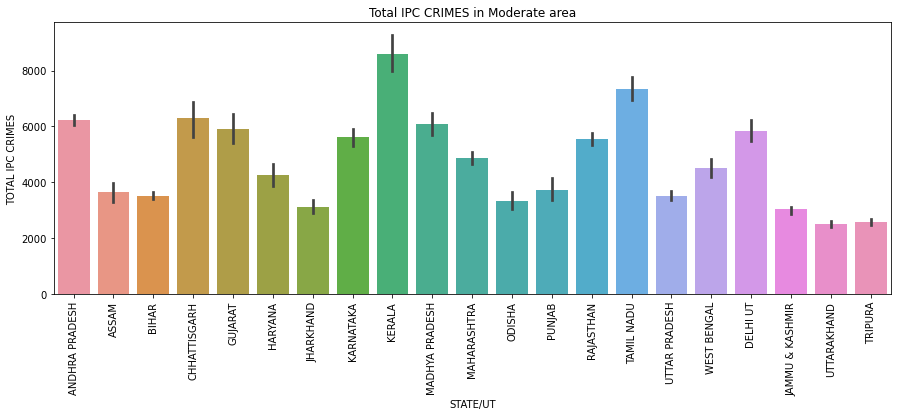

In [124]:
plt.figure(figsize=(15, 5))
sns.barplot(x='STATE/UT', y='TOTAL IPC CRIMES',data=moderatearea)
plt.xticks(rotation='90')
plt.title("Total IPC CRIMES in Moderate area")
plt.savefig('Total IPC CRIMES in Moderate area.jpg')
plt.show()

- Kearala Is the state which is more senstive towards TOTAL IPC CRIME

### STATE/UT vs Total crimes against women

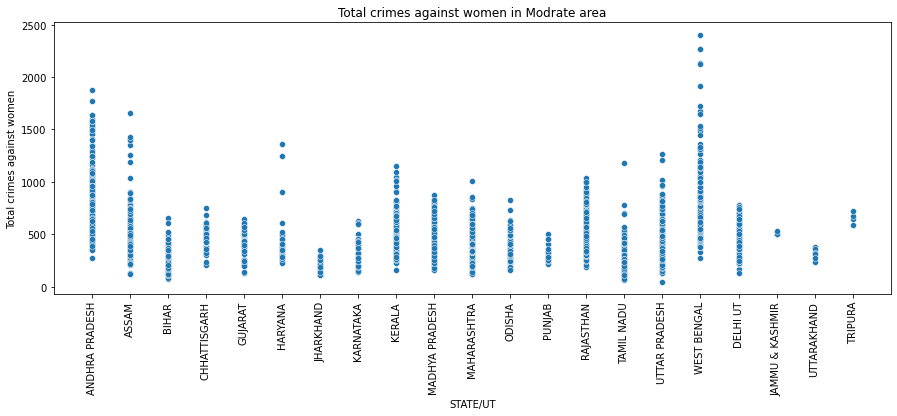

In [126]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='STATE/UT', y='Total crimes against women',data=moderatearea)
plt.xticks(rotation='90')
plt.title("Total crimes against women in Modrate area")
plt.savefig('Total crimes against womenin Moderate area.jpg')
plt.show()

- Top 3 states with higher crime against women are West Bengal,Andhra Pradesh,Uttar Pradesh .


### STATE/UT vs Total crimes against SCs

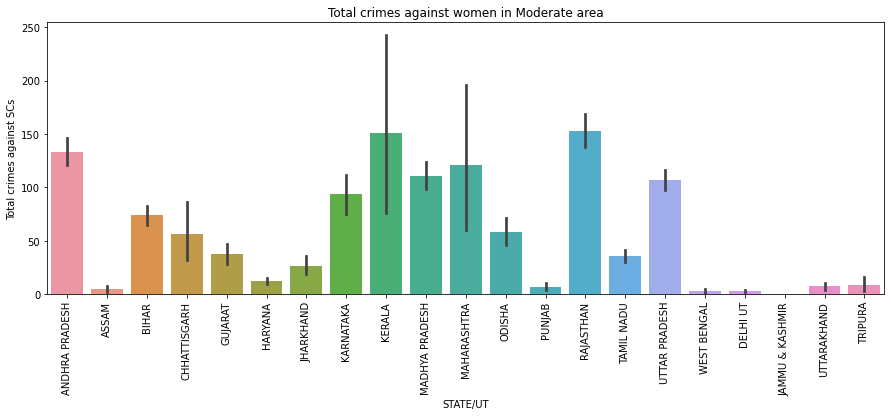

In [127]:
plt.figure(figsize=(15, 5))
sns.barplot(x='STATE/UT', y='Total crimes against SCs',data=moderatearea)
plt.xticks(rotation='90')
plt.title("Total crimes against women in Moderate area")
plt.savefig('Total crimes against women in Moderate area.jpg')
plt.show()

__Rajasthan,Andhra Pradesh , Kerala  is having highest number of Crimes against Scs

### State/UT vs Total crimes against STs

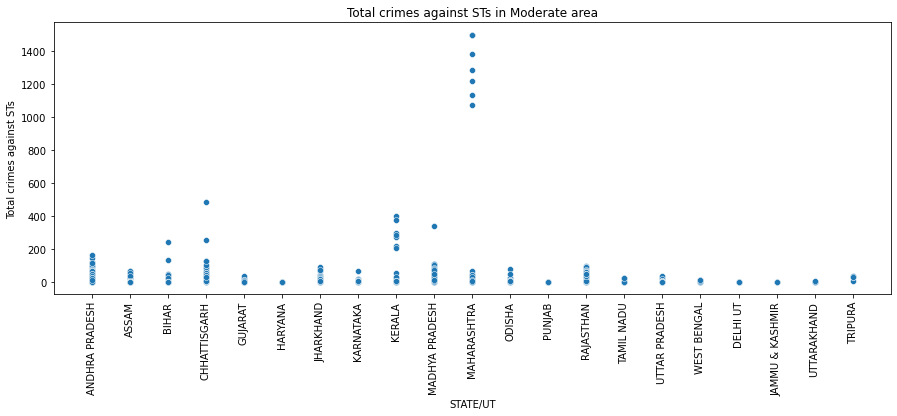

In [128]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='STATE/UT', y='Total crimes against STs',data=moderatearea)
plt.xticks(rotation='90')
plt.title("Total crimes against STs in Moderate area")
plt.savefig('Total crimes against STs in Moderate area.jpg')

plt.show()

Apart from __Maharshtra__ , every state has lesser crime against STs- since its a Moderate Area we have nither less nor highest crime values means Districts in this Cluster Neither too Peacefull Nor it too Violent.

## Plotting Pie chart to chck percentage of each crime in the Moderatearea dataset

In [131]:
tot_murder= moderatearea['MURDER'].sum()
tot_rape= moderatearea['RAPE'].sum()
tot_dowrydeaths = moderatearea['DOWRY DEATHS'].sum()

tot_kidnap= moderatearea['KIDNAPPING & ABDUCTION'].sum()
tot_dacoity= moderatearea['DACOITY'].sum()
tot_robbery = moderatearea['ROBBERY'].sum()
tot_burglary= moderatearea['BURGLARY'].sum()
tot_theft= moderatearea['THEFT'].sum()
tot_crimes_against_women = moderatearea['Total crimes against women'].sum()
tot_crimes_against_STs = moderatearea['Total crimes against STs'].sum()
tot_crimes_against_SCs = moderatearea['Total crimes against SCs'].sum()
tot_crimes_against_children = moderatearea['Total crimes against children'].sum()


crime_group = ['TOTAL Murder','TOTAL rape','Total Dowry Deaths','Total Kidnapping','TOTAL Dacoity','Total Robbery','TOtal Burglary','Total Theft','Total Riots',
                'Total Crimes Against Women','Total Crimes Against SC','Total Crimes against STs','Total Crimes Against Children']
values = [tot_murder,tot_rape,tot_dowrydeaths,tot_kidnap,tot_dacoity,tot_robbery,tot_burglary,
          tot_theft,tot_riots,tot_crimes_against_women,tot_crimes_against_STs,tot_crimes_against_SCs,tot_crimes_against_children]

colors = ['crimson','gold','green','yellow','blue','black']

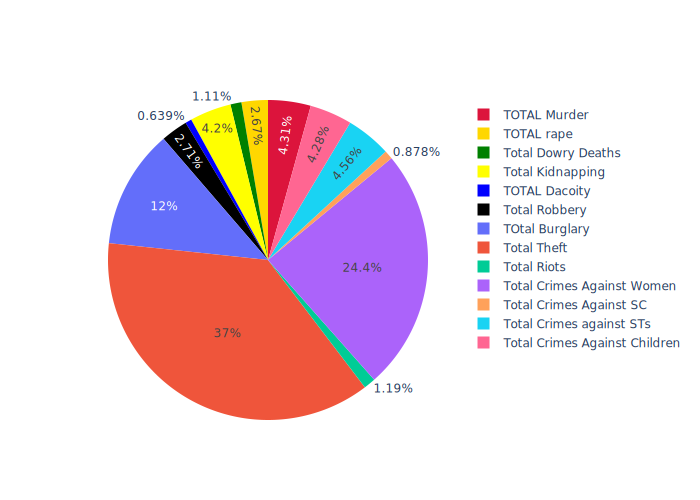

In [134]:
fig = go.Figure(data=[go.Pie(labels=crime_group, values=values,sort=False,
                            marker=dict(colors=colors),textfont_size=12)])

fig.show(renderer='svg')

__Total Theft is 37.1% covering of the data  which is the highest and Total dacoity are .63% which is the lowest of the crimes

In [87]:
moderatearea.groupby('DISTRICT').min()

STATE/UT    YEAR  MURDER  ATTEMPT TO MURDER  \
DISTRICT                                                               
24 PARGANAS NORTH     WEST BENGAL  2001.0   168.0                6.0   
24 PARGANAS SOUTH     WEST BENGAL  2001.0   107.0                2.0   
ADILABAD           ANDHRA PRADESH  2001.0    73.0               39.0   
AGRA                UTTAR PRADESH  2001.0   109.0              116.0   
AHMEDNAGAR            MAHARASHTRA  2001.0    81.0               38.0   
...                           ...     ...     ...                ...   
WARANGAL URBAN     ANDHRA PRADESH  2011.0    46.0               10.0   
WARDHA                MAHARASHTRA  2008.0    36.0               27.0   
WEST                     DELHI UT  2001.0    46.0               14.0   
WEST GODAVARI      ANDHRA PRADESH  2001.0    59.0               58.0   
YAVATMAL              MAHARASHTRA  2001.0    56.0               43.0   

                   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  \
DISTRICT                                                             
24 PARGANAS NORTH                                       38.0  53.0   
24 PARGANAS SOUTH                                       34.0  47.0   
ADILABAD                                                 8.0  35.0   
AGRA                                                    18.0  26.0   
AHMEDNAGAR                                               0.0  41.0   
...                                                      ...   ...   
WARANGAL URBAN                                           5.0  35.0   
WARDHA                                                   3.0  26.0   
WEST                                                     0.0  44.0   
WEST GODAVARI                                            0.0  52.0   
YAVATMAL                                                 1.0  33.0   

                   CUSTODIAL RAPE  OTHER RAPE  KIDNAPPING & ABDUCTION  \
DISTRICT                                                                
24 PARGANAS NORTH             0.0        53.0                    81.0   
24 PARGANAS SOUTH             0.0        47.0                    53.0   
ADILABAD                      0.0        35.0                    41.0   
AGRA                          0.0        26.0                    99.0   
AHMEDNAGAR                    0.0        41.0                    25.0   
...                           ...         ...                     ...   
WARANGAL URBAN                0.0        35.0                    55.0   
WARDHA                        0.0        26.0                    26.0   
WEST                          0.0        44.0                    48.0   
WEST GODAVARI                 0.0        52.0                    41.0   
YAVATMAL                      0.0        33.0                    28.0   

                   KIDNAPPING AND ABDUCTION OF OTHERS  ...  \
DISTRICT                                               ...   
24 PARGANAS NORTH                                 0.0  ...   
24 PARGANAS SOUTH                                 1.0  ...   
ADILABAD                                          6.0  ...   
AGRA                                             26.0  ...   
AHMEDNAGAR                                        7.0  ...   
...                                               ...  ...   
WARANGAL URBAN                                   40.0  ...   
WARDHA                                            4.0  ...   
WEST                                              6.0  ...   
WEST GODAVARI                                    20.0  ...   
YAVATMAL                                          1.0  ...   

                   HURT/GREVIOUS HURT  DOWRY DEATHS  \
DISTRICT                                              
24 PARGANAS NORTH                 0.0          23.0   
24 PARGANAS SOUTH                 0.0          43.0   
ADILABAD                       1044.0           5.0   
AGRA                            360.0          38.0   
AHMEDNAGAR                      575.0           0.0   
...                               .

Lets check the area which have highest Numbers of Total Theft and Riots

In [88]:
moderatearea.groupby('DISTRICT')['THEFT'].sum().sort_values()

DISTRICT
KANDHAMAL           45.0
BANKA              111.0
DAMOH              142.0
TIKAMGARH          172.0
SAHARSA            194.0
                  ...   
BHOPAL           25093.0
NAGPUR COMMR.    27488.0
WEST             27905.0
EAST             29165.0
SOUTH            33247.0
Name: THEFT, Length: 337, dtype: float64

In [89]:
moderatearea.loc[moderatearea['DISTRICT'] == 'SOUTH'].max()

STATE/UT                                     DELHI UT
DISTRICT                                        SOUTH
YEAR                                           2012.0
MURDER                                           86.0
ATTEMPT TO MURDER                                84.0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER        13.0
RAPE                                             96.0
CUSTODIAL RAPE                                    0.0
OTHER RAPE                                       96.0
KIDNAPPING & ABDUCTION                          256.0
KIDNAPPING AND ABDUCTION OF OTHERS              111.0
DACOITY                                           5.0
PREPARATION AND ASSEMBLY FOR DACOITY            110.0
ROBBERY                                         117.0
BURGLARY                                        518.0
THEFT                                          4104.0
AUTO THEFT                                     2302.0
OTHER THEFT                                    1947.0
RIOTS                       

- Kandhamal District of Odisha have lowest  35 cases of Total theft and South District OF Delhi is having highest number of Total Theft  with total count of 4104 in the year 2012.

In [90]:
moderatearea.groupby('DISTRICT')['RIOTS'].sum().sort_values()

DISTRICT
PATIALA           0.0
LUDHIANA          0.0
KANYAKUMARI       0.0
CP LUDHIANA       0.0
JALANDHAR         1.0
                ...  
PALAKKAD       6123.0
KOLLAM         6415.0
THRISSUR       6521.0
MALAPPURAM     7386.0
KANNUR         7600.0
Name: RIOTS, Length: 337, dtype: float64

In [91]:
moderatearea.loc[moderatearea['DISTRICT'] == 'KANNUR'].max()

STATE/UT                                     KERALA
DISTRICT                                     KANNUR
YEAR                                         2012.0
MURDER                                         32.0
ATTEMPT TO MURDER                              58.0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER      10.0
RAPE                                           66.0
CUSTODIAL RAPE                                  0.0
OTHER RAPE                                     66.0
KIDNAPPING & ABDUCTION                         23.0
KIDNAPPING AND ABDUCTION OF OTHERS              8.0
DACOITY                                        14.0
PREPARATION AND ASSEMBLY FOR DACOITY            5.0
ROBBERY                                        99.0
BURGLARY                                      277.0
THEFT                                         257.0
AUTO THEFT                                    103.0
OTHER THEFT                                   159.0
RIOTS                                        1277.0
CRIMINAL BRE

- Kannur District of kerala has highest count of Riots which is 1277 in year 2012.

In [92]:
moderatearea['STATE/UT'].value_counts()

UTTAR PRADESH      295
MADHYA PRADESH     242
ANDHRA PRADESH     241
MAHARASHTRA        238
BIHAR              233
RAJASTHAN          191
TAMIL NADU         135
KERALA             131
WEST BENGAL        128
ASSAM               90
DELHI UT            81
JHARKHAND           65
KARNATAKA           58
ODISHA              54
HARYANA             50
GUJARAT             43
CHHATTISGARH        43
PUNJAB              18
UTTARAKHAND          7
TRIPURA              4
JAMMU & KASHMIR      3
Name: STATE/UT, dtype: int64

- In Moderate Area Uttar Pradesh, Maharashtra, Andhra Pradesh, Bihar have highest counts of District and Tripura nad Jammu & kashnir has apparead only 3-4 times  that means In moderate Area UttarPradesh,Maharashtra, Andhra Pradesh, Bihar are highly prone to Crimes and States like Tripura, Jammu & Kashmir are like peacefull states.

### Analysis Peaceful Area Cluster

In [93]:
pd.pivot_table(sensitivearea, values =['MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS',  'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'Total crimes against women', 'Total crimes against children',
       'Total crimes against SCs', 'Total crimes against STs'], index =['STATE/UT','DISTRICT', 'YEAR'],
                          aggfunc = max)
#Pivot table representation of a particular crime by 'Year' and 'State' features

ARSON  ATTEMPT TO MURDER  AUTO THEFT  \
STATE/UT       DISTRICT    YEAR                                           
ANDHRA PRADESH CYBERABAD   2005.0   37.0               88.0       563.0   
                           2006.0   43.0               92.0       642.0   
                           2007.0   74.0               84.0      1124.0   
                           2008.0   42.0               66.0      1202.0   
                           2009.0   71.0               84.0      1365.0   
...                                  ...                ...         ...   
WEST BENGAL    MURSHIDABAD 2010.0   54.0              620.0       204.0   
                           2011.0   45.0              637.0       186.0   
                           2012.0   50.0              395.0       309.0   
               NADIA       2011.0   13.0              375.0       243.0   
                           2012.0   22.0              357.0       244.0   

                                   BURGLARY  CAUSING DEATH BY NEGLIGENCE  \
STATE/UT       DISTRICT    YEAR                                            
ANDHRA PRADESH CYBERABAD   2005.0    1139.0                        898.0   
                           2006.0    1321.0                       1064.0   
                           2007.0    1165.0                       1188.0   
                           2008.0    1319.0                       1166.0   
                           2009.0    1348.0                       1063.0   
...                                     ...                          ...   
WEST BENGAL    MURSHIDABAD 2010.0       7.0                        311.0   
                           2011.0      13.0                        290.0   
                           2012.0       4.0                        347.0   
               NADIA       2011.0      20.0                        156.0   
                           2012.0      21.0                        285.0   

                                   CHEATING  COUNTERFIETING  \
STATE/UT       DISTRICT    YEAR                               
ANDHRA PRADESH CYBERABAD   2005.0     950.0             5.0   
                           2006.0    1275.0             6.0   
                           2007.0    1192.0             5.0   
                           2008.0    1183.0             6.0   
                           2009.0    1174.0            13.0   
...                                     ...             ...   
WEST BENGAL    MURSHIDABAD 2010.0     170.0            30.0   
                           2011.0     189.0            27.0   
                           2012.0     157.0           110.0   
               NADIA       2011.0     291.0            11.0   
                           2012.0     338.0            21.0   

                                   CRIMINAL BREACH OF TRUST  \
STATE/UT       DISTRICT    YEAR                               
ANDHRA PRADESH CYBERABAD   2005.0                      83.0   
                           2006.0                     156.0   
                           2007.0                     103.0   
                           2008.0                     103.0   
                           2009.0                     124.0   
...                                                     ...   
WEST BENGAL    MURSHIDABAD 2010.0                      54.0   
                           2011.0                      96.0   
                           2012.0                      92.0   
               NADIA       2011.0                      99.0   
                           2012.0                     132.0   

                                   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  \
STATE/UT       DISTRICT    YEAR                                                
ANDHRA PRADESH CYBERABAD   2005.0                                       10.0   
                           2006.0                                       11.0   
                           2007.0                                        8.0   
                           200

In [94]:
print("We have {} Rows and {} Columns in our dataframe Peaceful Area ".format(peacefularea.shape[0], peacefularea.shape[1]))


We have 6106 Rows and 33 Columns in our dataframe Peaceful Area 


In [95]:
peacefularea['STATE/UT'].value_counts()

UTTAR PRADESH        558
MADHYA PRADESH       368
ODISHA               364
TAMIL NADU           320
KARNATAKA            317
GUJARAT              317
JAMMU & KASHMIR      307
PUNJAB               284
BIHAR                283
MAHARASHTRA          277
ASSAM                260
RAJASTHAN            245
JHARKHAND            235
CHHATTISGARH         211
HARYANA              206
ARUNACHAL PRADESH    183
HIMACHAL PRADESH     164
UTTARAKHAND          149
WEST BENGAL          141
NAGALAND             126
MANIPUR              113
ANDHRA PRADESH        97
MIZORAM               96
KERALA                90
DELHI UT              86
MEGHALAYA             84
TRIPURA               51
SIKKIM                48
GOA                   24
A & N ISLANDS         24
DAMAN & DIU           24
PUDUCHERRY            18
CHANDIGARH            12
D & N HAVELI          12
LAKSHADWEEP           12
Name: STATE/UT, dtype: int64

In [96]:
peacefularea['DISTRICT'].value_counts()

G.R.P.           45
NORTH            36
RAILWAYS         35
SOUTH            25
HAMIRPUR         24
                 ..
RAILWAYS KMR      1
GUNTUR URBAN      1
WARANGAL          1
CRIME KASHMIR     1
CAR               1
Name: DISTRICT, Length: 667, dtype: int64

In [97]:
peacefularea.describe().T

count         mean          std  \
YEAR                                       6106.0  2006.486734     3.430208   
MURDER                                     6106.0    30.038323    23.025190   
ATTEMPT TO MURDER                          6106.0    24.366852    24.992363   
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  6106.0     3.139371     5.825336   
RAPE                                       6106.0    17.071405    16.572413   
CUSTODIAL RAPE                             6106.0     0.001310     0.036176   
OTHER RAPE                                 6106.0    17.070095    16.572428   
KIDNAPPING & ABDUCTION                     6106.0    22.221749    21.960562   
KIDNAPPING AND ABDUCTION OF OTHERS         6106.0     5.273338     7.279523   
DACOITY                                    6106.0     4.367180     6.538574   
PREPARATION AND ASSEMBLY FOR DACOITY       6106.0     1.702096     5.806928   
ROBBERY                                    6106.0    14.884048    16.797254   
BURGLARY                                   6106.0    72.483950    68.867734   
THEFT                                      6106.0   196.379627   229.634136   
AUTO THEFT                                 6106.0    55.436456    93.339452   
OTHER THEFT                                6106.0   140.943171   179.543558   
RIOTS                                      6106.0    51.437930    68.183098   
CRIMINAL BREACH OF TRUST                   6106.0    11.497052    14.304942   
CHEATING                                   6106.0    41.180314    61.799537   
COUNTERFIETING                             6106.0     1.768261     3.825238   
ARSON                                      6106.0     8.287422     9.792378   
HURT/GREVIOUS HURT                         6106.0   213.380773   272.281412   
DOWRY DEATHS                               6106.0     5.881101     7.901541   
CAUSING DEATH BY NEGLIGENCE                6106.0    66.300852    84.479370   
OTHER IPC CRIMES                           6106.0   677.871438   730.375958   
TOTAL IPC CRIMES                           6106.0  1548.458565  1250.512930   
Total crimes against women                 6106.0   124.099738   105.873350   
Total crimes against children              6106.0    45.626433   213.707632   
Total crimes against SCs                   6106.0    63.077792   355.191322   
Total crimes against STs                   6106.0    11.246479    58.337893   
cluster                                    6106.0     2.000000     0.000000   

                                              min      25%     50%      75%  \
YEAR                                       2001.0  2004.00  2006.0  2009.00   
MURDER                                        0.0    12.00    26.0    43.00   
ATTEMPT TO MURDER                             0.0     6.00    18.0    34.00   
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER     0.0     0.00     1.0     3.00   
RAPE                                          0.0     5.00    12.0    24.00   
CUSTODIAL RAPE                                0.0     0.00     0.0     0.00   
OTHER RAPE                                    0.0     5.00    12.0    24.00   
KIDNAPPING & ABDUCTION                        0.0     6.00    16.0    32.00   
KIDNAPPING AND ABDUCTION OF OTHERS            0.0     1.00     3.0     7.00   
DACOITY                                       0.0     0.00     2.0     6.00   
PREPARATION AND ASSEMBLY FOR DACOITY          0.0     0.00     0.0     1.00   
ROBBERY                                       0.0     4.00    10.0    21.00   
BURGLARY                                      0.0    18.00    54.0   106.00   
THEFT                                         0.0    58.25   133.5   255.00   
AUTO THEFT                                    0.0     5.00    25.0    66.00   
OTHER THEFT                                   0.0    43.00    96.0   180.00   
RIOTS                                         0.0     5.00    28.0    69.00   
CRIMINAL BREACH OF TRUST                      0.0     2.00     7.0    16.00   
CHEATING      

- For Peaceful area we have the minimum values as the highest for each state that means crime count is the owest in this dataset that we can see in the describe method

### State/UT Vs TOTAL IPC CRIMES

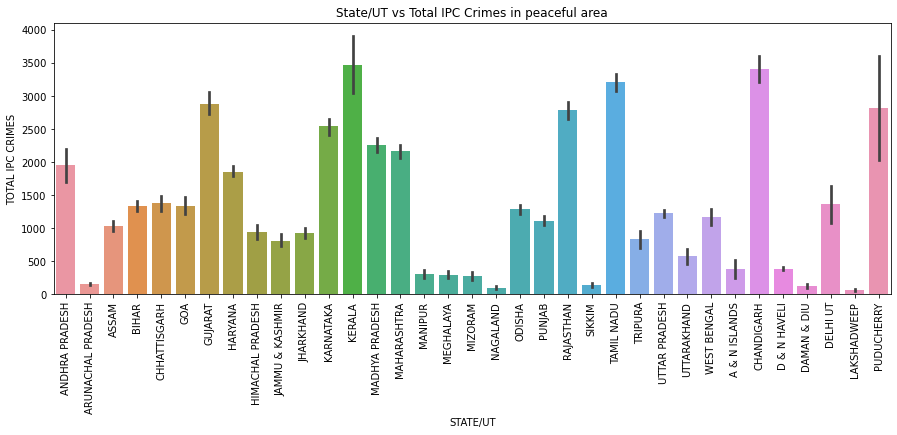

In [146]:
plt.figure(figsize=(15, 5))
sns.barplot(x='STATE/UT', y='TOTAL IPC CRIMES',data=peacefularea)
plt.xticks(rotation='90')
plt.title('State/UT vs Total IPC Crimes in peaceful area')
plt.savefig('Total IPC Crimes in peaceful area.jpg')
plt.show()

- In PeacefulArea Kerala,Tamil Nadu,Chandigarh,Karnataka,Gujarat, Anadhra Pradesh are the states which have higher counts of Tota IPC crimes.
- Arunachal Pradesh,Manipur, Meghalaya, Mizoram, Nagaland, Sikkim are the states which have lowest count of Total IPC CRIMES

### STATE/UT VS Total Crimes against Women

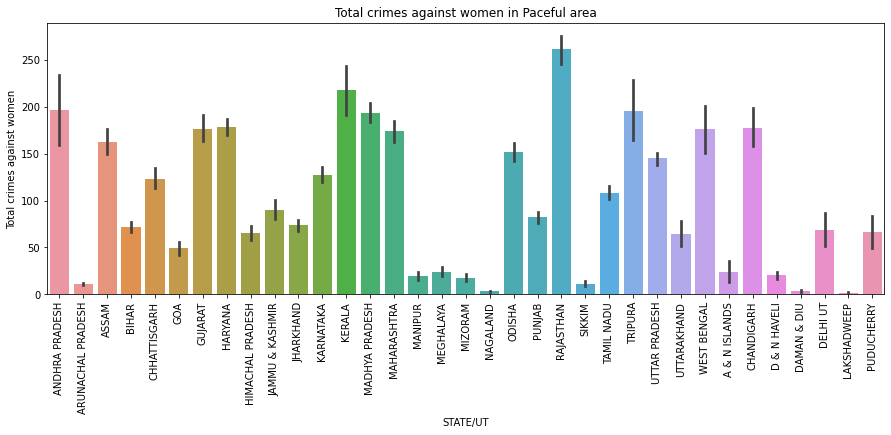

In [138]:
plt.figure(figsize=(15, 5))
sns.barplot(x='STATE/UT', y='Total crimes against women',data=peacefularea)
plt.xticks(rotation='90')
plt.title("Total crimes against women in Paceful area")
plt.savefig('crime agains women inoeacefula area')
plt.show()

- Rajasthan,Kerala,Andhra Pradesh,MAdhya Pradesh, Maharashtra are the states which are more prone to the crimes 
- Manipur, Meghaylaya ,Mizoram , Arunachal Pradesh are the states which are having lesser count of crimes against women.


__One thing needs to be highlighted here as Manipur, Meghaylaya ,Mizoram staes started showing some data here prior to this analysis these states were not showing so much data specially in Sensitive Area Dataframe__

### State /UT vs Total crimes against SCs

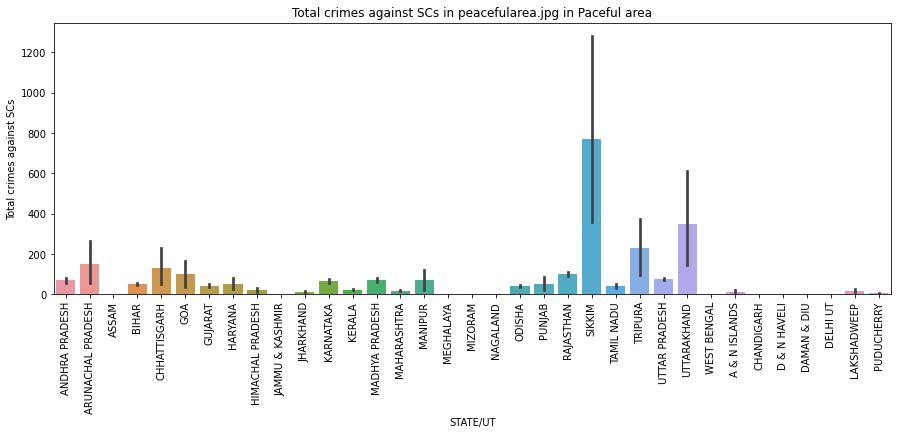

In [139]:
plt.figure(figsize=(15, 5))
sns.barplot(x='STATE/UT', y='Total crimes against SCs',data=peacefularea)
plt.xticks(rotation='90')
plt.title("Total crimes against SCs in peacefularea.jpg in Paceful area")
plt.savefig('crimes against SCs in peacefularea.jpg')
plt.show()

- Total crimes against SCs are showing highest  counts in Sikkim, Uttarakhand  and other states are showing like less counts for Total crimes against SCs

### State/UT vs Total crimes against STs

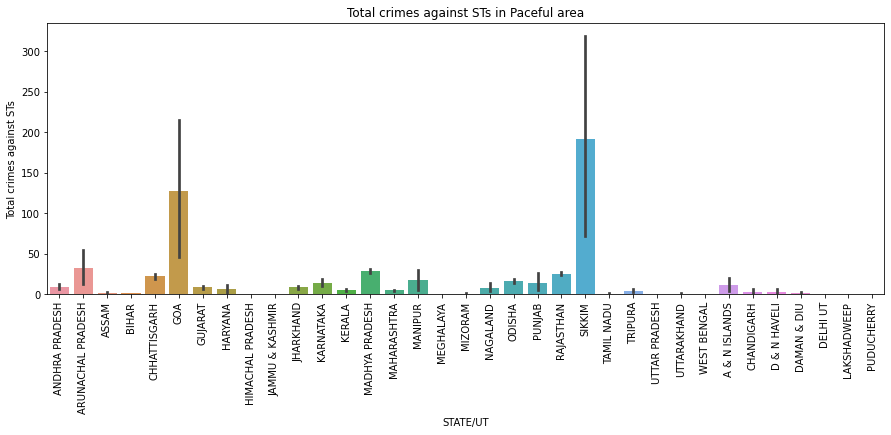

In [140]:
plt.figure(figsize=(15, 5))
sns.barplot(x='STATE/UT', y='Total crimes against STs',data=peacefularea)
plt.xticks(rotation='90')
plt.title("Total crimes against STs in Paceful area")
plt.savefig('crimes against STs in Paceful area')
plt.show()

### State /UT vs Total crimes against children

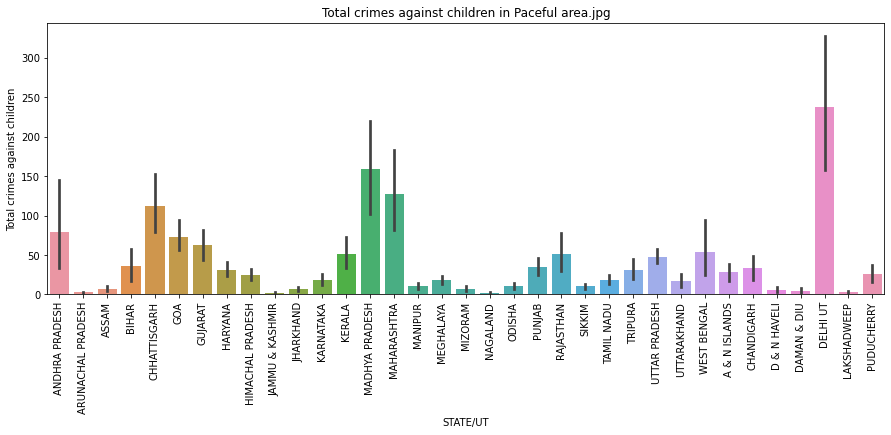

In [141]:
plt.figure(figsize=(15, 5))
sns.barplot(x='STATE/UT', y='Total crimes against children',data=peacefularea)
plt.xticks(rotation='90')
plt.title("Total crimes against children in Paceful area.jpg")
plt.show()

- Delhi UT, Madhya Pradesh, Maharashtra area the states which are showing data that too below 300 in the span of 12 years(2001- 2012).
- MIzoram,Manipur, Meghalaya,Arunchal Pradesh are  having lowest counts of Total Crimes against hidrean

In [142]:
tot_murder= peacefularea['MURDER'].sum()
tot_rape= peacefularea['RAPE'].sum()
tot_dowrydeaths = peacefularea['DOWRY DEATHS'].sum()

tot_kidnap= peacefularea['KIDNAPPING & ABDUCTION'].sum()
tot_dacoity= peacefularea['DACOITY'].sum()
tot_robbery = peacefularea['ROBBERY'].sum()
tot_burglary= peacefularea['BURGLARY'].sum()
tot_theft= peacefularea['THEFT'].sum()
tot_crimes_against_women = peacefularea['Total crimes against women'].sum()
tot_crimes_against_STs = peacefularea['Total crimes against STs'].sum()
tot_crimes_against_SCs = peacefularea['Total crimes against SCs'].sum()
tot_crimes_against_children = peacefularea['Total crimes against children'].sum()


crime_group = ['TOTAL Murder','TOTAL rape','Total Dowry Deaths','Total Kidnapping','TOTAL Dacoity','Total Robbery','TOtal Burglary','Total Theft','Total Riots',
                'Total Crimes Against Women','Total Crimes Against SC','Total Crimes against STs','Total Crimes Against Children']
values = [tot_murder,tot_rape,tot_dowrydeaths,tot_kidnap,tot_dacoity,tot_robbery,tot_burglary,
          tot_theft,tot_riots,tot_crimes_against_women,tot_crimes_against_STs,tot_crimes_against_SCs,tot_crimes_against_children]

colors = ['crimson','gold','green','yellow','blue','black']

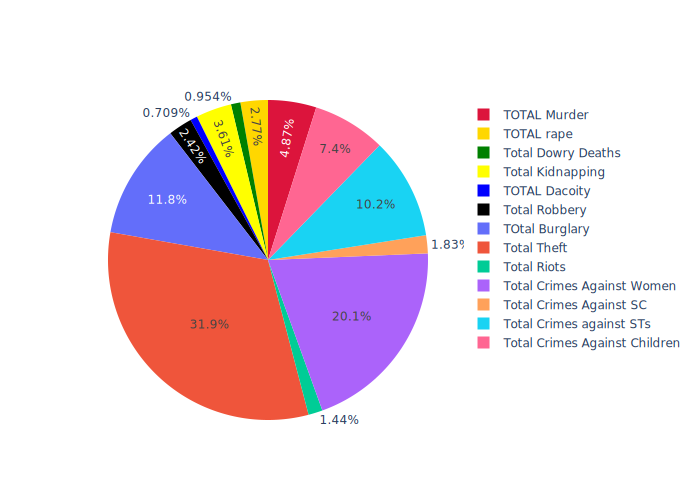

In [145]:
fig = go.Figure(data=[go.Pie(labels=crime_group, values=values,sort=False,
                            marker=dict(colors=colors),textfont_size=12)])

fig.show(renderer='svg')

__Total Dacoity are having the least share of crime and Total Theft are having the highest share of which is 31.9%__

In [106]:
peacefularea.groupby('DISTRICT').min()

STATE/UT    YEAR  MURDER  ATTEMPT TO MURDER  \
DISTRICT                                                            
A and N ISLANDS  A & N ISLANDS  2007.0    15.0               19.0   
AHMEDABAD RURAL        GUJARAT  2001.0    19.0                4.0   
AHWA-DANG              GUJARAT  2001.0     4.0                0.0   
AIZAWL                 MIZORAM  2001.0     4.0                4.0   
AKOLA              MAHARASHTRA  2001.0    38.0               34.0   
...                        ...     ...     ...                ...   
WEST                    SIKKIM  2001.0     1.0                0.0   
WOKHA                 NAGALAND  2001.0     1.0                2.0   
YADGIRI              KARNATAKA  2010.0    23.0               21.0   
YAMUNANAGAR            HARYANA  2001.0    21.0               14.0   
ZUNHEBOTO             NAGALAND  2001.0     0.0                1.0   

                 CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  \
DISTRICT                                                           
A and N ISLANDS                                        1.0   3.0   
AHMEDABAD RURAL                                        0.0   3.0   
AHWA-DANG                                              0.0   0.0   
AIZAWL                                                 0.0   6.0   
AKOLA                                                  0.0  15.0   
...                                                    ...   ...   
WEST                                                   0.0   0.0   
WOKHA                                                  0.0   0.0   
YADGIRI                                                0.0   5.0   
YAMUNANAGAR                                            0.0  12.0   
ZUNHEBOTO                                              0.0   0.0   

                 CUSTODIAL RAPE  OTHER RAPE  KIDNAPPING & ABDUCTION  \
DISTRICT                                                              
A and N ISLANDS             0.0         3.0                    12.0   
AHMEDABAD RURAL             0.0         3.0                    13.0   
AHWA-DANG                   0.0         0.0                     0.0   
AIZAWL                      0.0         6.0                     0.0   
AKOLA                       0.0        15.0                    15.0   
...                         ...         ...                     ...   
WEST                        0.0         0.0                     0.0   
WOKHA                       0.0         0.0                     0.0   
YADGIRI                     0.0         5.0                    20.0   
YAMUNANAGAR                 0.0        12.0                    15.0   
ZUNHEBOTO                   0.0         0.0                     0.0   

                 KIDNAPPING AND ABDUCTION OF OTHERS  ...  HURT/GREVIOUS HURT  \
DISTRICT                                             ...                       
A and N ISLANDS                                 3.0  ...                99.0   
AHMEDABAD RURAL                                 0.0  ...               236.0   
AHWA-DANG                                       0.0  ...                10.0   
AIZAWL                                          0.0  ...                11.0   
AKOLA                                           0.0  ...               720.0   
...                                             ...  ...                 ...   
WEST                                            0.0  ...                 5.0   
WOKHA                                           0.0  ...                 2.0   
YADGIRI                                         2.0  ...               289.0   
YAMUNANAGAR                                     2.0  ...               112.0   
ZUNHEBOTO                                       0.0  ...                 0.0   

                 DOWRY DEATHS  CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  \
DISTRICT                                                                       
A and N ISLANDS           1.0                          4.0             337.0   
AHMEDABAD RURAL           0.0     

In [107]:
peacefularea.groupby('DISTRICT')['THEFT'].sum().sort_values()

DISTRICT
CRIME KASHMIR        0.0
EOW                  0.0
CAW                  0.0
RAILWAYS KMR         0.0
BIEO                 0.0
                  ...   
BHOPAL RLY.      12301.0
CENTRAL          14184.0
CHANDIGARH       18474.0
MUMBAI RLY.      21604.0
G.R.P.           26817.0
Name: THEFT, Length: 667, dtype: float64

In [108]:
peacefularea[peacefularea['DISTRICT']=='G.R.P.'].max()

STATE/UT                                     UTTAR PRADESH
DISTRICT                                            G.R.P.
YEAR                                                2012.0
MURDER                                                31.0
ATTEMPT TO MURDER                                     25.0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              8.0
RAPE                                                   5.0
CUSTODIAL RAPE                                         0.0
OTHER RAPE                                             5.0
KIDNAPPING & ABDUCTION                                15.0
KIDNAPPING AND ABDUCTION OF OTHERS                     9.0
DACOITY                                               21.0
PREPARATION AND ASSEMBLY FOR DACOITY                   7.0
ROBBERY                                               99.0
BURGLARY                                              11.0
THEFT                                               3141.0
AUTO THEFT                                            90

-G.R.P. district of Uttar Pradesh has highest count of theft in th eyear 2012

In [109]:
peacefularea['DISTRICT'].max()

'ZUNHEBOTO'

- ZUNHEBOTO  of Nagaland is the DISTRICT which appreared the most in the dataframe , after finding the maximum values for each crime in the dataframe which can be seen down below.

In [110]:
peacefularea[peacefularea['DISTRICT']=='ZUNHEBOTO'].max()

STATE/UT                                      NAGALAND
DISTRICT                                     ZUNHEBOTO
YEAR                                            2012.0
MURDER                                            14.0
ATTEMPT TO MURDER                                  5.0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER          1.0
RAPE                                               3.0
CUSTODIAL RAPE                                     0.0
OTHER RAPE                                         3.0
KIDNAPPING & ABDUCTION                             3.0
KIDNAPPING AND ABDUCTION OF OTHERS                 0.0
DACOITY                                            2.0
PREPARATION AND ASSEMBLY FOR DACOITY               0.0
ROBBERY                                           10.0
BURGLARY                                          14.0
THEFT                                             27.0
AUTO THEFT                                         6.0
OTHER THEFT                                       23.0
RIOTS     

In [111]:
peacefularea['DISTRICT'].min()

'A and N ISLANDS'

In [112]:
peacefularea[peacefularea['DISTRICT']=='A and N ISLANDS'].max()

STATE/UT                                       A & N ISLANDS
DISTRICT                                     A and N ISLANDS
YEAR                                                  2007.0
MURDER                                                  15.0
ATTEMPT TO MURDER                                       19.0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER                1.0
RAPE                                                     3.0
CUSTODIAL RAPE                                           0.0
OTHER RAPE                                               3.0
KIDNAPPING & ABDUCTION                                  12.0
KIDNAPPING AND ABDUCTION OF OTHERS                       3.0
DACOITY                                                  5.0
PREPARATION AND ASSEMBLY FOR DACOITY                     0.0
ROBBERY                                                  9.0
BURGLARY                                                90.0
THEFT                                                  112.0
AUTO THEFT              

- Andaman & Nicobar Islands Union Terrority has the minimum entries in the dataset and max value for this district is showing the maximum value for each crime category in the year 2007 

## silhouette_score


In [147]:
silhouette_score(X,y_kmeans)#data and cluster

0.42520682759990786

### 4.3"Analyse your clusters and prepare a report that explains all your observations.

### States in Sensitve area- Total rows 140 and columns 32.
As per this Cluster Crimes are the highest in every state.
__West Bengal ,Maharashtra,Andhra Pradesh,Uttar Pradesh,Bihar,Gujarat  ,Karnataka Rajasthan Madhya       Pradesh,Delhi Ut, Tamil Nadu __has shown more crime against any categories.Means these are the states which are not that much safe and are highly prone to crimes  .

-  DISTRICTS LIKE __HYDERABAD CITY,AHMEDABAD COMMR, BANGALORE COMMR.  ,PATNA   , KOLKATA  , CYBERABAD  ,LUCKNOW    PUNE COMMR.  ,MUMBAI COMMR.  ,24 PARGANAS NORTH  INDORE , 24 PARGANAS SOUTH ,THANE COMMR. , JAIPUR   ,MUMBAI   , MURSHIDABAD   ,NORTH-WEST,NADA,AGRA  ,CHENNAI  ,GHAZIABAD   ,SOUTH   ,JALPAIGURI  ,KANPUR NAGAR  ,NORTH WEST ,ALWAR__ Are the Districts which are not safe.

- As we can See the States Like West Bengal ,Maharashtra,Andhra Pradesh,Uttar Pradesh,Bihar,Gujarat,Karnataka Rajasthan Madhya  Pradesh,Delhi Ut, Tamil Nadu are the larger States Population wise and Area wise as well. Population is one of the important factors influencing incidence of crime. A number of socio-economic factors, besides population, could influence the crime situation at a particular place. The present analysis of crime rate is restricted to the influence of population only. 


### States in Moderate area- Total 2350 Rows and 33 Columns-

As per this Cluster  Moderate area is that area where Crimes are less than Sensitive area but higher than Peaceful area,
- States West Bengal ,Maharashtra,Andhra Pradesh,Uttar Pradesh,Bihar,Gujarat  ,Karnataka Rajasthan Madhya       Pradesh,Delhi Ut, Tamil Nadu are still showing higher crimes in every categories, But the states like Tripura, Punjab, Jharkhand, Odisha , Haryana , Jammu & Kashmir are also present in this dtaset which showing moderate crimes in each category.

### States in Peaceful area- Total 6106 Rows and 33 Columns-

As per this Cluster  Peaceful area is that area where Crimes are less than both Sensitive and Moderate area.
-  Whene ever there is higher crime showing in each category we found the states like West Bengal ,Maharashtra,Andhra Pradesh,Uttar Pradesh,Bihar,Gujarat  ,Karnataka Rajasthan are showing higher crime values. But in lesser cimes States like __Mizoram, Tripura, Manipur,GOA, Assam , Arunachal Pradesh, Sikkim,Nagaland,Uttarakhand,Daman & Diu, Dadar and Nagar Haveli, A7 N Islands, Puducheery, Chandigarh, Lakshdweep__  (Union Territories ) started showing data.
-  Peacefularea is the dataframe which consist of Lowest crimes count in each category of crime so when we analyzed each crime we saw entries from States which are having the lowest crimes.


As per the analysis of above clusters-<br> 
__Sensitive States- Maharashtra, Rajasthan, Uttar Pradesh, DELHI,West Bengal, Tamil Nadu, Andhra Pradesh, Madhya Pradesh, Bihar.<br>
Moderate States- Uttarakhand, Kerala, Goa,Jharkhand, Karnataka,Chhatisgarh, Haryana, Himachal Pradesh__<br>
__Peaceful States - Sikkim, Mizoram ,Tripua, Manipur, Assam,Nagaland, A &N Islands, Lakshdweep,Meghlaya,Arunachal Pradesh__


- Literacy can make any country better so if we educate  more people around us we can stop these crimes day by day andcan make our Country a better place to live.   
- Schemes Indian Government, at all levels, announced Welfare Schemes for a cross section of the society from time to time. These schemes could be either Central, State specific or a joint collaboration between the Centre and the States.By Encouraging people to join these programs can help people to become beeter in life.

- Many  women and child development schemes has benn announced like- Women's Empowerment and Gender Equity.POSHAN Abhiyaan.,Anganwadi Services.,Pradhan Mantri Matru Vandana Yojana (PMMVY) ,Beti Bachao Beti Padhao (BBBP) ,One Stop Centre (OSC) and Universalization of Women Helplines(WHL),hild Protection Services (CPS),Scheme for Adolescent Girls (SAG) so women of Rural area are also should be encouraged to join these programs.




### 4.4 Capstone project overall story in your own words. Min 1000 words.

In the duration of 3 weeeks we were asked to given  submission of this Capston Project that is - Crimes in India.
We were already given the data (10 CSV files which were compireses of States/UR, District , Year(2001- 2012) and Diffrent Crime head.And we were asked to collect the data on 
- The population of each state.
- Literacy Rate in each state
- Area of each state
Initially I was Confuse about data collection part as but as soon as I started working on this Project I Start to understand and  made some assumption as  Population, Litercay rate that was given only for 2001 and 2011 so I calculated the growth rate and found the Population, Litercay rate for Every State per year.

It took so long as I added Few columns for my analysis in the dataset  like Population in Rural/Urban Area, Total male, Tota Female, Population Litercay, Male Literacy, Female Literacy, Area of each state and Diiferent Crimes Head Like Murdeer, Riots, DOwry deaths, Raes, Arson, Total Crimes against Women/Children/SCs/STs,

After colecting data from 2001 to 2012 for each column I entered in to Second Phase .

- Phase 2 was about Analysis of State/Ut wise for diiferent Crimes and found the States/UT which were prone to crimes and which were less prone to crimes.I USed Different Plots and charts to analyse the dataset .
- I read the csv file , saved into dataframe and checked for Info(), null value and proccesded accordingly.

- I came to know about the plotly library in python which made my plots so interactable. Plotted Different Charts, Barplot, Scaaterplots, Line Plots and wrote down my analysis.

- I also calculatd Crime rate for each state from 2001 to 2012 and 

- Phase 3 is about SQL Opertaion - Insertion into table and then Extacting data as per the query 
- Applied different SQL queries to get the inforamtion. Saved the inforamtion in dataframe and analysed that as well.

- Pahse 4 is about clustering implementataion as the files that were already given we joined them and made a new dataset  nd applied KMEANS algorithm for clustering.Got 3 Cluster - Sensitive, MOderate , Peaceful CLuster and Reason for crimes in Sensitve states and how can we stop that Crimes in those states.
 
 

